# 多次元スチューデントのt分布の作図

----

【編集履歴】

- 2022/12/01：「分布の計算」「分布の作図」を追加

----


In [1]:
# 更新日時を出力
import datetime
now = datetime.datetime.now()
print('更新日時：' + '{0:%Y-%m-%d %H:%M}'.format(now))

更新日時：2022-12-02 08:00


# 多次元スチューデントのt分布の計算

　多次元スチューデントのt分布(Multivariate Student's t Distribution)の確率密度を計算します。多次元t分布については「分布の定義式」を参照してください。  
<br>

　利用するライブラリを読み込みます。

In [2]:
# ライブラリを読み込み
import numpy as np
from scipy.special import gamma, loggamma
from scipy.stats import multivariate_t

<br>

## 確率密度の計算

　多次元スチューデントのt分布に従う確率密度を計算する方法をいくつか確認します。  
<br>

### スケール行列を使用

　まずは、スケール行列を用いてt分布を計算します。  
<br>

#### パラメータの設定

　t分布の次元数$D$とパラメータ$\boldsymbol{\mu}, \boldsymbol{\Sigma}$、確率変数の値$\mathbf{x}$を設定します。

In [3]:
# 次元数を指定
D = 3

# 自由度を指定
nu = 5

# 位置ベクトルを指定
mu_d = np.array([10.0, -6.0, 1.5])

# スケール行列を指定
sigma_dd = np.array(
    [[4.0, 1.8, -0.1], 
     [1.8, 9.0, 2.4], 
     [-0.1, 2.4, 1.0]]
)

# 確率変数の値を指定
x_d = np.array([11.5, -5.0, 0.0])

　自由度(形状パラメータ)$\nu$、位置ベクトル$\boldsymbol{\mu}$、スケール行列$\boldsymbol{\Sigma}$、確率変数の値$\mathbf{x}$を指定します。$\boldsymbol{\mu}, \mathbf{x}$は$D$次元ベクトル、$\boldsymbol{\Sigma}$は$D \times D$の行列です。

$$
\boldsymbol{\mu}
    = \begin{pmatrix}
          \mu_1 \\
          \mu_2 \\
          \vdots \\
          \mu_D
      \end{pmatrix}
,\ 
\boldsymbol{\Sigma}
    = \begin{pmatrix}
          \sigma_{1,1} & \sigma_{1,2} & \cdots & \sigma_{1,D} \\
          \sigma_{2,1} & \sigma_{2,2} & \cdots & \sigma_{2,D} \\
          \vdots & \vdots & \ddots & \vdots \\
          \sigma_{D,1} & \sigma_{D,2} & \cdots & \sigma_{D,D}
      \end{pmatrix}
,\ 
\mathbf{x}
    = \begin{pmatrix}
          x_1 \\
          x_2 \\
          \vdots \\
          x_D
      \end{pmatrix}
$$

　$x_d$は実数をとり、$\nu$は正の実数、$\mu_d$は実数、$\sigma_{d,d}$は正の実数、$\sigma_{i,j} = \sigma_{j,i}\ (i \neq j)$は実数、また$\boldsymbol{\Sigma}$は正定値行列を満たす必要があります。設定した値に従う確率密度を計算します。  
<br>

#### スクラッチで計算

　定義式から計算します。

In [4]:
# 定義式により確率密度を計算
C_St = gamma(0.5 * (nu + D)) / gamma(0.5 * nu)
C_St /= np.sqrt(np.pi * nu)**D * np.sqrt(np.linalg.det(sigma_dd))
x_tilde_d1 = (x_d - mu_d).reshape((D, 1))
tmp_term = x_tilde_d1.T.dot(np.linalg.inv(sigma_dd)).dot(x_tilde_d1).item()
dens = C_St / np.sqrt(1.0 + tmp_term / nu)**(nu + D)
print(dens)

0.0003309268920926894


　t分布は、$\boldsymbol{\Sigma}$を用いて次の式で定義されます。

$$
\begin{aligned}
C_{\mathrm{St}}(\nu, \boldsymbol{\Sigma})
   &= \frac{
          \Gamma(\frac{\nu + D}{2})
      }{
          \Gamma(\frac{\nu}{2})
      }
      \frac{
          1
      }{
          (\pi \nu)^{\frac{D}{2}}
          |\boldsymbol{\Sigma}|^{\frac{1}{2}}
      }
\\
\mathrm{St}(\mathbf{x} | \nu, \boldsymbol{\mu}, \boldsymbol{\Sigma})
   &= C_{\mathrm{St}}(\nu, \boldsymbol{\Sigma})
      \left\{
          1
          + \frac{1}{\nu}
            (\mathbf{x} - \boldsymbol{\mu})^{\top}
            \boldsymbol{\Sigma}^{-1}
            (\mathbf{x} - \boldsymbol{\mu})
      \right\}^{-\frac{\nu+D}{2}}
\end{aligned}
$$

　ここで、$C_{\mathrm{St}}$はt分布の正規化係数、$\pi$は円周率、$\mathbf{A}^{\top}$は転置行列、$\mathbf{A}^{-1}$は逆行列、$|\mathbf{A}|$は行列式、2分の1乗は平方根$\sqrt{a} = a^{\frac{1}{2}}$です。  
　円周率は`np.pi`、転置は`.T`メソッド、逆行列`np.linalg.inv()`、行列式は`np.linalg.det()`、行列の積は`np.dot()`で計算できます。  

　対数をとった定義式から計算します。

In [5]:
# 対数をとった定義式により確率密度を計算
log_C_St = loggamma(0.5 * (nu + D)) - loggamma(0.5 * nu)
log_C_St -= D * 0.5 * np.log(np.pi * nu) + 0.5 * np.log(np.linalg.det(sigma_dd))
x_tilde_d1 = (x_d - mu_d).reshape((D, 1))
tmp_term = x_tilde_d1.T.dot(np.linalg.inv(sigma_dd)).dot(x_tilde_d1).item()
log_dens = log_C_St - (nu + D) * 0.5 * np.log(1.0 + tmp_term / nu)
dens = np.exp(log_dens)
print(dens, log_dens)

0.0003309268920926896 -8.013613076793145


　対数をとった定義式を計算します。

$$
\begin{aligned}
\log C_{\mathrm{St}}(\nu, \boldsymbol{\Sigma})
   &= \log \Gamma \Bigl(\frac{\nu + D}{2}\Bigr)
      - \log \Gamma \Bigl(\frac{\nu}{2}\Bigr)
      - \frac{D}{2}
        \log (\pi \nu)
      - \frac{1}{2}
        \log |\boldsymbol{\Sigma}| \\
\log \mathrm{St}(\mathbf{x} | \nu, \boldsymbol{\mu}, \boldsymbol{\Sigma})
   &= \log C_{\mathrm{St}}(\nu, \boldsymbol{\Sigma})
      - \frac{\nu+D}{2}
        \log \Bigl\{
          1
          + \frac{1}{\nu}
            (\mathbf{x} - \boldsymbol{\mu})^{\top}
            \boldsymbol{\Sigma}^{-1}
            (\mathbf{x} - \boldsymbol{\mu})
        \Bigr\}
\end{aligned}
$$

　計算結果の指数をとると確率密度が得られます。

$$
\mathrm{St}(\mathbf{x} | \nu, \boldsymbol{\mu}, \boldsymbol{\Sigma})
    = \exp \Bigr(
          \log \mathrm{St}(\mathbf{x} | \nu, \boldsymbol{\mu}, \boldsymbol{\Sigma})
      \Bigr)
$$

　指数と対数の性質より$\exp(\log x) = x$です。  

　次は、モジュールを使って確率密度を計算します。  
<br>

#### クラスで計算

　`SciPy`ライブラリの`stats`モジュールの多次元t分布のクラス`multivariate_t`の確率密度メソッド`pdf()`で計算します。

In [6]:
# 関数により確率密度を計算
dens = multivariate_t.pdf(x=x_d, loc=mu_d, shape=sigma_dd, df=nu)
print(dens)

0.00033092689209273426


　確率変数の引数`x`に`x_d`、位置ベクトルの引数`loc`に`mu_d`、スケール行列の引数`shape`に`sigma_dd`、自由度の引数`df`に`nu`を指定します。  

　`logpdf()`だと対数をとった確率密度を返します。

In [7]:
# 対数をとった関数により確率密度を計算
log_dens = multivariate_t.logpdf(x=x_d, loc=mu_d, shape=sigma_dd, df=nu)
print(dens, log_dens)

0.00033092689209273426 -8.01361307679301


　計算結果の指数をとると確率密度が得られます。  
<br>

### 逆スケール行列を使用

　次は、逆スケール行列を用いてt分布を計算します。  
<br>

#### パラメータの設定

　スケール行列$\boldsymbol{\Sigma}$の代わりに、逆スケール行列$\boldsymbol{\Lambda}$を指定します。

In [8]:
# 逆スケール行列を指定
lambda_dd = np.array(
    [[4.0, 1.8, -0.1], 
     [1.8, 9.0, 2.4], 
     [-0.1, 2.4, 1.0]]
)

<br>

　あるいは、$\boldsymbol{\Sigma}$を指定して$\boldsymbol{\Lambda}$を計算します。

In [9]:
# 逆スケール行列を計算
lambda_dd = np.linalg.inv(sigma_dd)
print(lambda_dd)

[[ 0.36960986 -0.23271732  0.59548255]
 [-0.23271732  0.45516769 -1.1156742 ]
 [ 0.59548255 -1.1156742   3.73716632]]


　逆スケール行列は、スケール行列の逆行列$\boldsymbol{\Lambda} = \boldsymbol{\Sigma}^{-1}$です。  
<br>

#### スクラッチで計算

　定義式から計算します。

In [10]:
# 定義式により確率密度を計算
C_St = gamma(0.5 * (nu + D)) / gamma(0.5 * nu)
C_St *= np.sqrt(np.linalg.det(lambda_dd)) / np.sqrt(np.pi * nu)**D
x_tilde_d1 = (x_d - mu_d).reshape((D, 1))
tmp_term = x_tilde_d1.T.dot(lambda_dd).dot(x_tilde_d1).item()
dens = C_St / np.sqrt(1.0 + tmp_term / nu)**(nu + D)
print(dens)

0.0003309268920926894


　t分布は、$\boldsymbol{\Lambda}$を用いて次の式で定義されます。

$$
\begin{aligned}
C_{\mathrm{St}}(\nu, \boldsymbol{\Lambda})
   &= \frac{
          \Gamma(\frac{\nu + D}{2})
      }{
          \Gamma(\frac{\nu}{2})
      }
      \frac{
          |\boldsymbol{\Lambda}|^{\frac{1}{2}}
      }{
          (\pi \nu)^{\frac{D}{2}}
      }
\\
\mathrm{St}(\mathbf{x} | \nu, \boldsymbol{\mu}, \boldsymbol{\Lambda})
   &= C_{\mathrm{St}}(\nu, \boldsymbol{\Lambda})
      \left\{
          1
          + \frac{1}{\nu}
            (\mathbf{x} - \boldsymbol{\mu})^{\top}
            \boldsymbol{\Lambda}
            (\mathbf{x} - \boldsymbol{\mu})
      \right\}^{-\frac{\nu+D}{2}}
\end{aligned}
$$

　対数をとった定義式から計算します。

In [11]:
# 対数をとった定義式により確率密度を計算
log_C_St = loggamma(0.5 * (nu + D)) - loggamma(0.5 * nu)
log_C_St += 0.5 * np.log(np.linalg.det(lambda_dd)) - D * 0.5 * np.log(np.pi * nu)
x_tilde_d1 = (x_d - mu_d).reshape((D, 1))
tmp_term = x_tilde_d1.T.dot(lambda_dd).dot(x_tilde_d1).item()
log_dens = log_C_St - (nu + D) * 0.5 * np.log(1.0 + tmp_term / nu)
dens = np.exp(log_dens)
print(dens, log_dens)

0.0003309268920926896 -8.013613076793145


　対数をとった定義式を計算します。

$$
\begin{aligned}
\log C_{\mathrm{St}}(\nu, \boldsymbol{\Lambda})
   &= \log \Gamma \Bigl(\frac{\nu + D}{2}\Bigr)
      - \log \Gamma \Bigl(\frac{\nu}{2}\Bigr)
      - \frac{D}{2}
        \log (\pi \nu)
      + \frac{1}{2}
        \log |\boldsymbol{\Lambda}| \\
\log \mathrm{St}(\mathbf{x} | \nu, \boldsymbol{\mu}, \boldsymbol{\Lambda})
   &= \log C_{\mathrm{St}}(\nu, \boldsymbol{\Lambda})
      - \frac{\nu+D}{2}
        \log \Bigl\{
          1
          + \frac{1}{\nu}
            (\mathbf{x} - \boldsymbol{\mu})^{\top}
            \boldsymbol{\Lambda}
            (\mathbf{x} - \boldsymbol{\mu})
        \Bigr\}
\end{aligned}
$$

　計算結果の指数をとると確率密度が得られます。  
<br>

#### クラスで計算

　`multivariate_t`クラスの`pdf()`または`logpdf()`で計算します。

In [12]:
# 関数により確率密度を計算
dens = multivariate_t.pdf(x=x_d, loc=mu_d, shape=np.linalg.inv(lambda_dd), df=nu)
print(dens)

# 対数をとった関数により確率密度を計算
log_dens = multivariate_t.logpdf(x=x_d, loc=mu_d, shape=np.linalg.inv(lambda_dd), df=nu)
print(dens, log_dens)

0.00033092689209272954
0.00033092689209272954 -8.013613076793025


　スケール行列の引数`shape`に`lambda_dd`の逆行列を指定します。  
<br>

### 標準化t分布による計算

　続いて、確率変数の値を変換しておき、標準化t分布により確率密度を計算します。スケール行列と固有値・固有ベクトルの関係については「分散共分散行列と固有値・固有ベクトルの関係の導出」を参照してください。  
<br>

　スケール行列の固有値と固有ベクトルを計算します。

In [13]:
# 固有値・固有ベクトルを計算
res_eigen = np.linalg.eig(sigma_dd)
lambda_d, u_dd = res_eigen[0], res_eigen[1].T
print(lambda_d)
print(u_dd)

[10.14233952  3.61882683  0.23883365]
[[ 0.26925095  0.93222699  0.24177834]
 [ 0.94887152 -0.21383579 -0.23220055]
 [ 0.16476276 -0.2919368   0.94213913]]


　固有値$\lambda_d$と固有ベクトル$\mathbf{u}_d = (u_{d,1}, \cdots, u_{d, D})$を`np.linalg.eig()`で計算します。タプルが出力されるので、0番目の要素の固有値(をまとめた1次元配列)、1番目の要素の固有ベクトル(をまとめた2次元配列)を取り出します。数式での成分と合わせるために転置しておきます。  

　確率変数の値を変換します。

In [14]:
# 変数を変換
y_d = np.dot(u_dd, (x_d - mu_d).reshape((D, 1))).flatten() / np.sqrt(lambda_d)
print(y_d)

[ 0.30565977  0.81887966 -2.98339094]


　$D$個の固有値$\lambda_d$を対角成分とする対角行列を$\mathbf{V}$(固有値の逆数$\frac{1}{\lambda_d}$を対角成分とする対角行列を$\mathbf{V}^{-1}$)、固有ベクトル$\mathbf{u}_d^{\top}$を行方向に並べた行列を$\mathbf{U}$として、次の式を計算します。

$$
\begin{aligned}
\mathbf{y}
   &= \mathbf{V}^{-\frac{1}{2}} \mathbf{U}
      (\mathbf{x} - \boldsymbol{\mu})
\\
y_d
   &= \frac{1}{\sqrt{\lambda_d}}
      \mathbf{u}_d^{\top}
      (\mathbf{x} - \boldsymbol{\mu})
\end{aligned}
$$

　$\mathbf{x}$の確率密度を計算します。

In [15]:
# Σを用いて標準化t分布により確率密度を計算
dens = multivariate_t.pdf(x=y_d, loc=np.zeros(D), shape=np.identity(D), df=nu)
dens /= np.sqrt(np.linalg.det(sigma_dd))
print(dens)

0.00033092689209268997


　標準化t分布に従う$\mathbf{y}$の確率密度を計算して、$\boldsymbol{\Sigma}$の行列式の平方根の逆数を掛けます。  

$$
\mathrm{St}(\mathbf{x} | \nu, \boldsymbol{\mu}, \boldsymbol{\Sigma})
    = \frac{
          1
      }{
          |\boldsymbol{\Sigma}|^{\frac{1}{2}}
      }
      \mathrm{St}(\mathbf{y} | \nu)
$$

　標準化t分布に従う$\mathbf{y}$の確率密度を計算して、$\boldsymbol{\Sigma}$の行列式の平方根の逆数を掛けます。  
　標準化t分布の計算は、`multivariate_t.pdf()`の位置ベクトルの引数`loc`に0ベクトル、スケール行列の引数`shape`に単位行列を指定して計算できます。  

　逆スケール行列を用いる場合は、次のように計算します。

In [16]:
# Λを用いて標準化t分布により確率密度を計算
dens = np.sqrt(np.linalg.det(lambda_dd))
dens *= multivariate_t.pdf(x=y_d, loc=np.zeros(D), shape=np.identity(D), df=nu)
print(dens)

0.0003309268920926901


　標準化t分布に従う$\mathbf{y}$の確率密度を計算して、$\boldsymbol{\Lambda}$の行列式の平方根を掛けます。

$$
\mathrm{St}(\mathbf{x} | \nu, \boldsymbol{\mu}, \boldsymbol{\Lambda})
    = |\boldsymbol{\Lambda}|^{\frac{1}{2}}
      \mathrm{St}(\mathbf{y} | \nu)
$$

<br>

## 統計量の計算

　最後に、多次元スチューデントのt分布の期待値・共分散・最頻値を計算します。  
<br>

　期待値を計算します。

In [17]:
# 期待値を計算:(ν > 1)
E_x_d = mu_d
print(E_x_d)

[10.  -6.   1.5]


　t分布の期待値は$\boldsymbol{\mu}$です。ただし、$\nu > 1$の場合に定義されます。  

$$
\mathbb{E}[\mathbf{x}]
    = \boldsymbol{\mu}
    \quad
      (\nu > 1)
$$

　共分散を計算します。

In [18]:
# Σを使って共分散を計算:(ν > 2)
cov_x_dd = nu / (nu - 2) * sigma_dd
print(cov_x_dd)

# Λを使って共分散を計算:(ν > 2)
cov_x_dd = nu / (nu - 2) * np.linalg.inv(lambda_dd)
print(cov_x_dd)

[[ 6.66666667  3.         -0.16666667]
 [ 3.         15.          4.        ]
 [-0.16666667  4.          1.66666667]]
[[ 6.66666667  3.         -0.16666667]
 [ 3.         15.          4.        ]
 [-0.16666667  4.          1.66666667]]


　t分布の分散は、$\boldsymbol{\Sigma}$または$\boldsymbol{\Lambda}$を使って、次の式で計算できます。ただし、$\nu > 2$の場合に定義されます。

$$
\mathrm{Cov}[\mathbf{x}]
    = \frac{\nu}{\nu - 2}
      \boldsymbol{\Sigma}
    = \frac{\nu}{\nu - 2}
      \boldsymbol{\Lambda}^{-1}
    \quad
      (\nu > 2)
$$

　$\boldsymbol{\Sigma} = \boldsymbol{\Lambda}^{-1}$が成り立つのが分かります。  

　最頻値を計算します。

In [19]:
# 最頻値を計算
mode_x_d = mu_d
print(mode_x_d)

[10.  -6.   1.5]


　t分布の最頻値は$\boldsymbol{\mu}$です。

$$
\mathrm{mode}[\mathbf{x}]
    = \boldsymbol{\mu}
$$

<br>

　この記事では、多次元t分布の計算を確認しました。次は、グラフを作成します。  
<br>

# 2次元スチューデントのt分布の作図

　2次元スチューデントのt分布(Bivariate Student's t Distribution)のグラフを作成します。t分布については「定義式の確認」を参照してください。  
<br>

　利用するパッケージを読み込みます。

In [20]:
# ライブラリを読み込み
import numpy as np
from scipy.stats import multivariate_t
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

<br>

## 定義式の確認

　まずは、多次元t分布の定義式を確認します。  
<br>

　t分布は、次の式で定義されます。

$$
\mathrm{St}(\mathbf{x} | \nu, \boldsymbol{\mu}, \boldsymbol{\Sigma})
    = \frac{
          \Gamma(\frac{\nu + D}{2})
      }{
          \Gamma(\frac{\nu}{2})
      }
      \frac{
          1
      }{
          (\pi \nu)^{\frac{D}{2}}
          |\boldsymbol{\Sigma}|^{\frac{1}{2}}
      }
      \left\{
          1
          + \frac{1}{\nu}
            (\mathbf{x} - \boldsymbol{\mu})^{\top}
            \boldsymbol{\Sigma}^{-1}
            (\mathbf{x} - \boldsymbol{\mu})
      \right\}^{-\frac{\nu+D}{2}}
$$

　ここで、$\nu$は形状(自由度)パラメータ、$\boldsymbol{\mu}$は位置ベクトルパラメータ、$\boldsymbol{\Sigma}$はスケール行列パラメータ、$\boldsymbol{\Lambda}$は逆スケール行列パラメータです。また、$\mathbf{A}^{\top}$は行列$\mathbf{A}$の転置行列、$\mathbf{A}^{-1}$は逆行列、$|\mathbf{A}|$は行列式、2分の1乗は平方根$\sqrt{a} = a^{\frac{1}{2}}$です。  
　$\mathbf{x}, \boldsymbol{\mu}$は$D$次元ベクトル、$\boldsymbol{\Sigma}$は$D \times D$の正定値行列です。

$$
\mathbf{x}
    = \begin{pmatrix}
          x_1 \\
          x_2 \\
          \vdots \\
          x_D
      \end{pmatrix}
,\ 
\boldsymbol{\mu}
    = \begin{pmatrix}
          \mu_1 \\
          \mu_2 \\
          \vdots \\
          \mu_D
      \end{pmatrix}
,\ 
\boldsymbol{\Sigma}
    = \begin{pmatrix}
          \sigma_{1,1} & \sigma_{1,2} & \cdots & \sigma_{1,D} \\
          \sigma_{2,1} & \sigma_{2,2} & \cdots & \sigma_{2,D} \\
          \vdots & \vdots & \ddots & \vdots \\
          \sigma_{D,1} & \sigma_{D,2} & \cdots & \sigma_{D,D}
      \end{pmatrix}
$$

　$x_d$は実数をとり、$\nu$は正の実数、$\mu_d$は実数、$\sigma_{d,d}$は正の実数、$\sigma_{i,j} = \sigma_{j,i}\ (i \neq j)$は実数、また$\boldsymbol{\Sigma}$は正定値行列を満たす必要があります。  

　この計算を行いグラフを作成します。  
<br>

## グラフの作成

　`Matplotlib`ライブラリを利用して、2次元t分布のグラフを作成します。t分布の確率密度の計算については「分布の計算」を参照してください。  
<br>

　t分布のパラメータ$\nu, \boldsymbol{\mu}, \boldsymbol{\Sigma}$を設定します。この例では、2次元のグラフで描画するため、次元数を$D = 2$とします。

In [21]:
# 次元数を設定:(固定)
D = 2

# 自由度を指定
nu = 3

# 位置ベクトルを指定
mu_d = np.array([6.0, 10.0])

# スケール行列を指定
sigma_dd = np.array(
    [[1.0, 0.6], 
     [0.6, 4.0]]
)

　位置ベクトル$\boldsymbol{\mu} = (\mu_1, \mu_2)$、スケール行列$\boldsymbol{\Sigma} = (\sigma_{1,1}, \sigma_{2,1}, \sigma_{1,2}, \sigma_{2,2})$を指定します。  

　設定したパラメータに応じて、t分布の確率変数がとり得る値$\mathbf{x}$の成分$x_1, x_2$の値を作成します。

In [22]:
# xの値を作成
x_1_vals = np.linspace(
    start=mu_d[0] - np.sqrt(sigma_dd[0, 0])*3.0, 
    stop=mu_d[0] + np.sqrt(sigma_dd[0, 0])*3.0, 
    num=101
)
x_2_vals = np.linspace(
    start=mu_d[1] - np.sqrt(sigma_dd[1, 1])*3.0, 
    stop=mu_d[1] + np.sqrt(sigma_dd[1, 1])*3.0, 
    num=101
)
print(x_1_vals[:5])
print(x_2_vals[:5])

[3.   3.06 3.12 3.18 3.24]
[4.   4.12 4.24 4.36 4.48]


　$x_1$(x軸)の値を`x_1_vals`、$x_2$(y軸)の値を`x_2_vals`とします。この例では、それぞれ$\mu_d$を中心に$\sqrt{\sigma_{d,d}}$の3倍を範囲とします。  

　$\mathbf{x}$の点を作成します。

In [23]:
# 作図用のxの点を作成
x_1_grid, x_2_grid = np.meshgrid(x_1_vals, x_2_vals)

# 計算用のxの点を作成
x_points = np.stack([x_1_grid.flatten(), x_2_grid.flatten()], axis=1)
x_dims = x_1_grid.shape
print(x_points)
print(x_dims)

[[ 3.    4.  ]
 [ 3.06  4.  ]
 [ 3.12  4.  ]
 ...
 [ 8.88 16.  ]
 [ 8.94 16.  ]
 [ 9.   16.  ]]
(101, 101)


　`x_1_vals`と`x_2_vals`の要素の全ての組み合わせ(格子状の点)を`np.meshgrid()`で作成して`x_1_grid, x_2_grid`とします。  
　`x_1_grid, x_2_grid`を`np.stack()`で列方向に並べて`x_points`とします。`x_1_grid, x_2_grid`の同じインデックス、`x_points`の各行が点$\mathbf{x} = (x_1, x_2)$に対応します。  

　$\mathbf{x}$の点ごとの確率密度を計算します。

In [24]:
# 多次元t分布の確率密度を計算
dens = multivariate_t.pdf(x=x_points, loc=mu_d, shape=sigma_dd, df=nu)
print(dens)

[0.0011164  0.00116294 0.00121077 ... 0.00121077 0.00116294 0.0011164 ]


　多次元t分布の確率密度は、`SciPy`ライブラリの`stats`モジュールの`multivariate_t`クラスの`pdf()`で計算できます。確率変数の引数`x`に`x_points`、位置ベクトルの引数`loc`に`mu_d`、スケール行列の引数`shape`に`sigma_dd`、自由度の引数`df`に`nu`を指定します。  

　パラメータの値を数式で表示するための文字列を作成します。

In [25]:
# パラメータラベル用の文字列を作成
param_text = '$\\nu=' + str(nu)
param_text += ', \mu=(' + ', '.join([str(mu) for mu in mu_d]) + ')'
param_text += ', \Sigma=' + str([list(sigma_d) for sigma_d in sigma_dd]) + '$'
print(param_text)

$\nu=3, \mu=(6.0, 10.0), \Sigma=[[1.0, 0.6], [0.6, 4.0]]$


　LaTeXコマンドを使って`$`で挟みます。  

　t分布の等高線図を作成します。

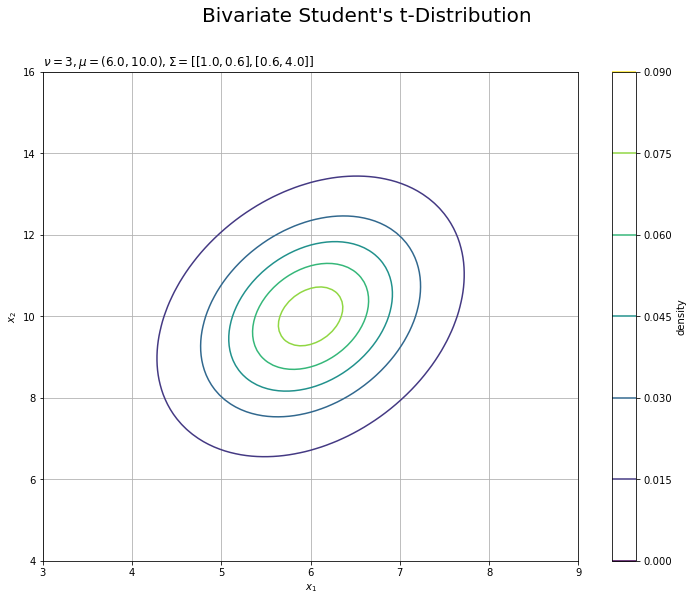

In [26]:
# 2次元t分布を作図:(等高線図)
plt.figure(figsize=(12, 9), facecolor='white') # 図の設定
cnf = plt.contour(x_1_grid, x_2_grid, dens.reshape(x_dims)) # 等高線
#cnf = plt.contourf(x_1_grid, x_2_grid, dens.reshape(x_dims)) # 塗りつぶし等高線
plt.xlabel('$x_1$') # x軸ラベル
plt.ylabel('$x_2$') # y軸ラベル
plt.suptitle("Bivariate Student's t-Distribution", fontsize=20) # 全体のタイトル
plt.title(param_text, loc='left') # タイトル
plt.colorbar(cnf, label='density') # カラーバー
plt.grid() # グリッド線
plt.show() # 描画

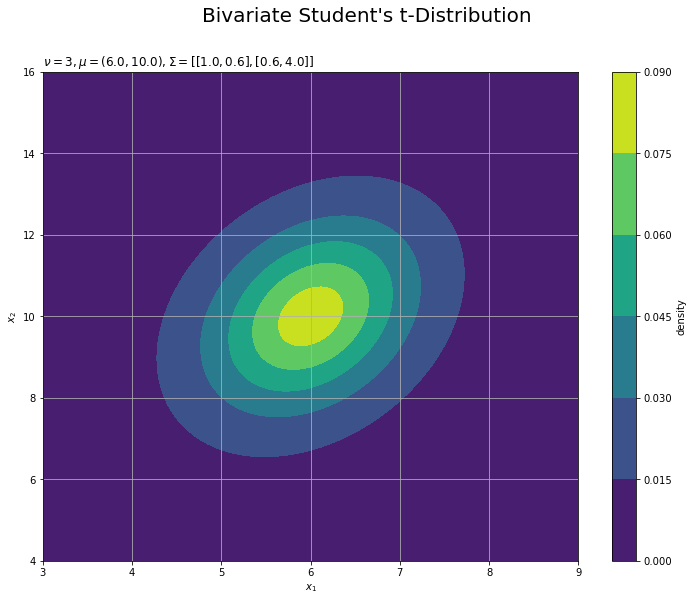

In [27]:
### 資料作成用:(再掲)

# 2次元t分布を作図:(等高線図)
plt.figure(figsize=(12, 9), facecolor='white') # 図の設定
#cnf = plt.contour(x_1_grid, x_2_grid, dens.reshape(x_dims)) # 等高線
cnf = plt.contourf(x_1_grid, x_2_grid, dens.reshape(x_dims)) # 塗りつぶし等高線
plt.xlabel('$x_1$') # x軸ラベル
plt.ylabel('$x_2$') # y軸ラベル
plt.suptitle("Bivariate Student's t-Distribution", fontsize=20) # 全体のタイトル
plt.title(param_text, loc='left') # タイトル
plt.colorbar(cnf, label='density') # カラーバー
plt.grid() # グリッド線
plt.show() # 描画

　等高線は`plt.contour()`、塗りつぶし等高線は`plt.contourf()`で描画できます。  

　確率密度の変化を細かく見るには、ヒートマップで可視化します。

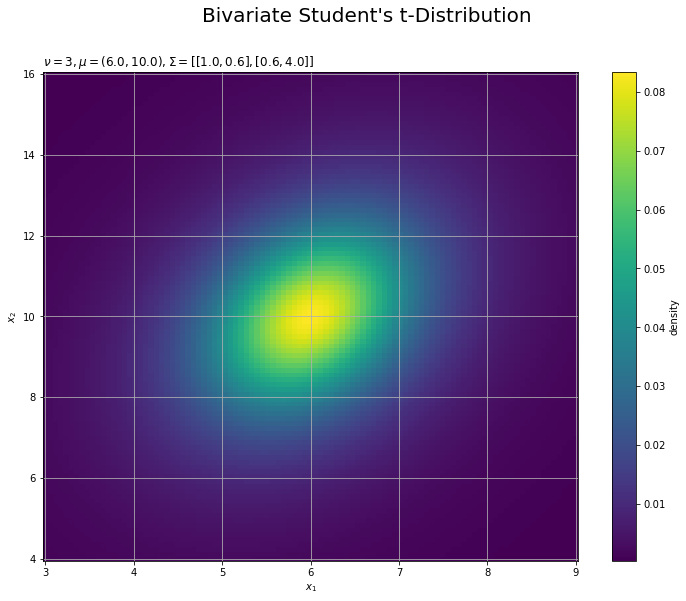

In [28]:
# 2次元t分布を作図:(ヒートマップ)
plt.figure(figsize=(12, 9), facecolor='white') # 図の設定
pcl = plt.pcolor(x_1_grid, x_2_grid, dens.reshape(x_dims)) # ヒートマップ
plt.xlabel('$x_1$') # x軸ラベル
plt.ylabel('$x_2$') # y軸ラベル
plt.suptitle("Bivariate Student's t-Distribution", fontsize=20) # 全体のタイトル
plt.title(param_text, loc='left') # タイトル
plt.colorbar(pcl, label='density') # カラーバー
plt.grid() # グリッド線
plt.show() # 描画

　ヒートマップは`plt.pcolor()`で描画できます。  

　3Dプロットを作成します。

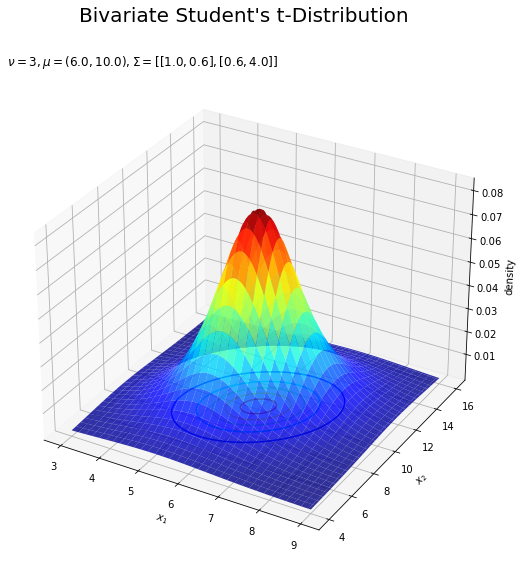

In [29]:
# 2次元t分布を作図:曲面図
fig = plt.figure(figsize=(9, 9), facecolor='white') # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定
ax.plot_surface(x_1_grid, x_2_grid, dens.reshape(x_dims), 
                cmap='jet', alpha=0.8) # 曲面図
ax.contour(x_1_grid, x_2_grid, dens.reshape(x_dims), 
           cmap='jet', offset=0.0) # 等高線図
ax.set_xlabel('$x_1$') # x軸ラベル
ax.set_ylabel('$x_2$') # y軸ラベル
ax.set_zlabel('density') # z軸ラベル
fig.suptitle("Bivariate Student's t-Distribution", fontsize=20) # 全体のタイトル
ax.set_title(param_text, loc='left') # タイトル
plt.show() # 描画

　曲面図は`ax.plot_surface()`で描画できます。  
<br>

　t分布のグラフを描画できました。以降は、ここまでの作図処理を用いて、パラメータの影響を確認していきます。  
<br>

## パラメータと分布の形状の関係

　パラメータの値を少しずつ変化させて、分布の形状の変化をアニメーションで確認します。  
<br>

### 自由度の影響

　まずは、自由度$\nu$の値を変化させ、$\boldsymbol{\mu}, \boldsymbol{\Sigma}$を固定します。

In [30]:
# 次元数を設定:(固定)
D = 2

# 自由度として利用する値を指定
nu_vals = np.arange(start=0.1, stop=15.1, step=0.1).round(decimals=1)

# 位置ベクトルを指定
mu_d = np.array([6.0, 10.0])

# スケール行列を指定
sigma_dd = np.array([[1.0, 0.6], [0.6, 4.0]])

# フレーム数を設定
frame_num = len(nu_vals)
print(frame_num)

150


　値の間隔が一定になるように$\nu$の値を`nu_vals`として作成します。パラメータごとにフレームを切り替えるので、`nu_vals`の要素数がアニメーションのフレーム数になります。  

　設定したパラメータに応じて、作図用と計算用の$\mathbf{x}$を作成します。

In [31]:
# xの値を作成
x_1_vals = np.linspace(
    start=mu_d[0] - np.sqrt(sigma_dd[0, 0])*3.0, 
    stop=mu_d[0] + np.sqrt(sigma_dd[0, 0])*3.0, 
    num=101
)
x_2_vals = np.linspace(
    start=mu_d[1] - np.sqrt(sigma_dd[1, 1])*3.0, 
    stop=mu_d[1] + np.sqrt(sigma_dd[1, 1])*3.0, 
    num=101
)

# 作図用のxの点を作成
x_1_grid, x_2_grid = np.meshgrid(x_1_vals, x_2_vals)

# 計算用のxの点を作成
x_points = np.stack([x_1_grid.flatten(), x_2_grid.flatten()], axis=1)
x_shape = x_1_grid.shape
print(x_points.round(3))

[[ 3.    4.  ]
 [ 3.06  4.  ]
 [ 3.12  4.  ]
 ...
 [ 8.88 16.  ]
 [ 8.94 16.  ]
 [ 9.   16.  ]]


<br>

　全てのフレームで共通のグラデーションと等高線を引くための値を設定します。

In [32]:
# z軸(確率密度)の最小値・最大値を設定
z_min = 0.0
z_max = multivariate_t.pdf(x=x_points, loc=mu_d, shape=sigma_dd, df=nu_vals.mean()).max()
z_max = np.ceil(z_max * 10.0) / 10.0

# 等高線を引く値を設定
z_levels = np.linspace(start=z_min, stop=z_max, num=11)
print(z_levels)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]


　z軸(グラデーション)の最小値と最大値を設定して、等高線を描画する値を作成します(もう少し上手く最大値を設定したい。具体的には、小数点以下の桁数を指定して切り上げたい)。  
　等高線の数は、`num`引数に対応します。  

　等高線図のアニメーション(gif画像)を作成します。

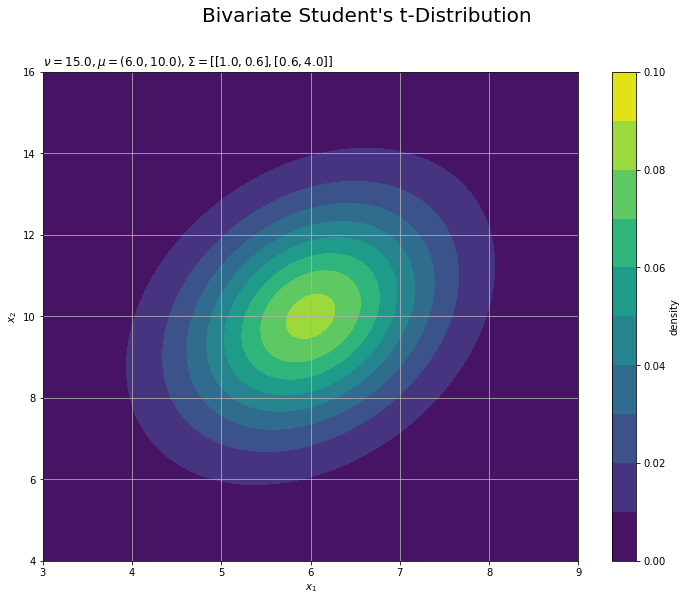

In [33]:
# 図を初期化
fig = plt.figure(figsize=(12, 9), facecolor='white') # 図の設定
fig.suptitle("Bivariate Student's t-Distribution", fontsize=20) # 全体のタイトル

# カラーバーを表示
tmp = plt.contourf(x_1_grid, x_2_grid, np.zeros(x_shape), 
                   vmin=z_min, vmax=z_max, levels=z_levels) # カラーバー用のダミー
fig.colorbar(tmp, label='density')

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目の自由度を取得
    nu = nu_vals[i]
    
    # 多次元t分布の確率密度を計算
    dens = multivariate_t.pdf(x=x_points, loc=mu_d, shape=sigma_dd, df=nu)
    
    # パラメータラベル用の文字列を作成
    param_text = '$\\nu=' + str(nu)
    param_text += ', \mu=(' + ', '.join([str(mu) for mu in mu_d]) + ')'
    param_text += ', \Sigma=' + str([list(sigma_d) for sigma_d in sigma_dd]) + '$'

    # 2次元t分布を作図:(等高線図)
    #plt.contour(x_1_grid, x_2_grid, dens.reshape(x_dims), 
    #             vmin=z_min, vmax=z_max, levels=z_levels) # 等高線
    plt.contourf(x_1_grid, x_2_grid, dens.reshape(x_dims), 
                 vmin=z_min, vmax=z_max, levels=z_levels) # 塗りつぶし等高線
    plt.xlabel('$x_1$') # x軸ラベル
    plt.ylabel('$x_2$') # y軸ラベル
    plt.title(param_text, loc='left') # タイトル
    plt.grid() # グリッド線

# gif画像を作成
anime_dens = FuncAnimation(fig, update, frames=frame_num, interval=100)

# gif画像を保存
anime_dens.save('../../figure/Python/Bivariate_t_dens_nu_cnf.gif')

　各フレームの確率密度の計算と作図処理を関数として定義して、`FuncAnimation()`を使ってアニメーション(gif画像)を作成する。  

　同様に、ヒートマップのアニメーションを作成します。

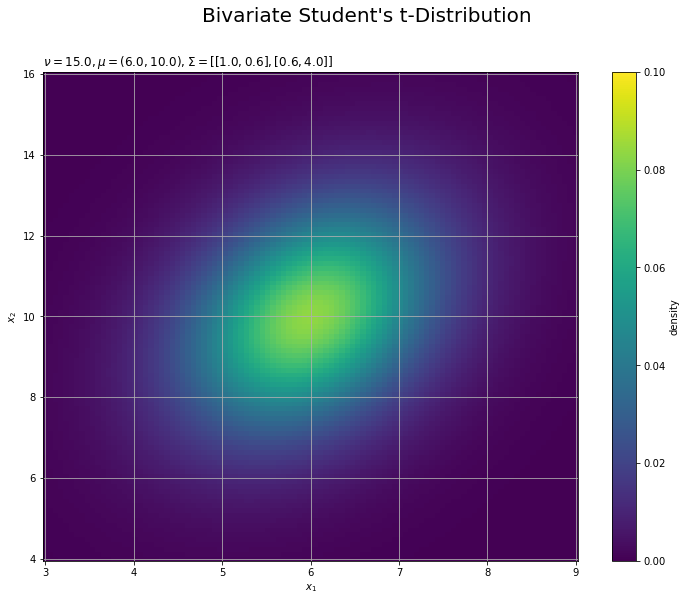

In [34]:
# 図を初期化
fig = plt.figure(figsize=(12, 9), facecolor='white') # 図の設定
fig.suptitle("Bivariate Student's t-Distribution", fontsize=20) # 全体のタイトル

# カラーバーを表示
tmp = plt.pcolor(x_1_grid, x_2_grid, np.zeros(x_shape), 
                 vmin=z_min, vmax=z_max) # カラーバー用のダミー
fig.colorbar(tmp, label='density')

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目の自由度を取得
    nu = nu_vals[i]
    
    # 多次元t分布の確率密度を計算
    dens = multivariate_t.pdf(x=x_points, loc=mu_d, shape=sigma_dd, df=nu)
    
    # パラメータラベル用の文字列を作成
    param_text = '$\\nu=' + str(nu)
    param_text += ', \mu=(' + ', '.join([str(mu) for mu in mu_d]) + ')'
    param_text += ', \Sigma=' + str([list(sigma_d) for sigma_d in sigma_dd]) + '$'

    # 2次元t分布を作図:(ヒートマップ)
    plt.pcolor(x_1_grid, x_2_grid, dens.reshape(x_dims), 
               vmin=z_min, vmax=z_max) # 塗りつぶし等高線
    plt.xlabel('$x_1$') # x軸ラベル
    plt.ylabel('$x_2$') # y軸ラベル
    plt.title(param_text, loc='left') # タイトル
    plt.grid() # グリッド線

# gif画像を作成
anime_dens = FuncAnimation(fig, update, frames=frame_num, interval=100)

# gif画像を保存
anime_dens.save('../../figure/Python/Bivariate_t_dens_nu_pcl.gif')

<br>

　3Dプロットのアニメーションを作成します。

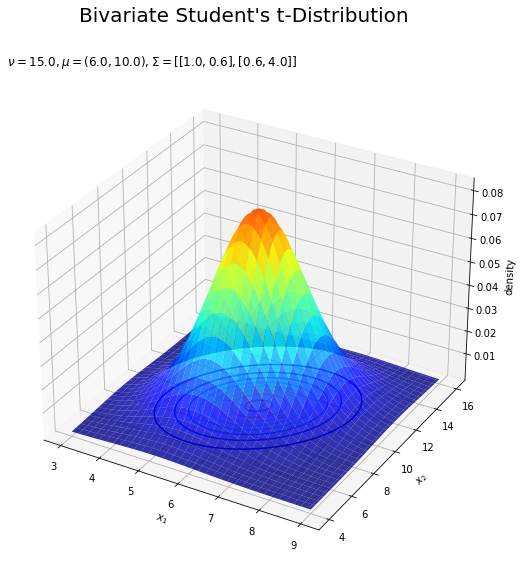

In [35]:
# 図を初期化
fig = plt.figure(figsize=(9, 9), facecolor='white') # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定
fig.suptitle("Bivariate Student's t-Distribution", fontsize=20) # 全体のタイトル

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目の自由度を取得
    nu = nu_vals[i]
    
    # 多次元t分布の確率密度を計算
    dens = multivariate_t.pdf(x=x_points, loc=mu_d, shape=sigma_dd, df=nu)
    
    # パラメータラベル用の文字列を作成
    param_text = '$\\nu=' + str(nu)
    param_text += ', \mu=(' + ', '.join([str(mu) for mu in mu_d]) + ')'
    param_text += ', \Sigma=' + str([list(sigma_d) for sigma_d in sigma_dd]) + '$'

    # 2次元t分布を作図:(曲面図)
    ax.plot_surface(x_1_grid, x_2_grid, dens.reshape(x_shape), 
                    cmap='jet', vmin=z_min, vmax=z_max, alpha=0.8) # 曲面図
    ax.contour(x_1_grid, x_2_grid, dens.reshape(x_shape), 
               cmap='jet', vmin=z_min, vmax=z_max, levels=z_levels, offset=0.0) # 等高線図
    ax.set_xlabel('$x_1$') # x軸ラベル
    ax.set_ylabel('$x_2$') # y軸ラベル
    ax.set_zlabel('density') # z軸ラベル
    ax.set_title(param_text, loc='left') # タイトル

# gif画像を作成
anime_dens = FuncAnimation(fig, update, frames=frame_num, interval=100)

# gif画像を保存
anime_dens.save('../../figure/Python/Bivariate_t_dens_nu_srf.gif')

　$\nu$の値に応じて、形状が変化するのが分かります。  
<br>

### 位置ベクトル(1軸)の影響

　次は、x軸方向の位置パラメータ$\mu_1$の値を変化させ、$\nu, \mu_2, \boldsymbol{\Sigma}$を固定します。

In [36]:
# 次元数を設定:(固定)
D = 2

# 自由度を指定
nu = 3

# x軸の位置パラメータとして利用する値を指定
mu_1_vals = np.linspace(start=-2.0, stop=2.0, num=101).round(decimals=2)

# y軸位置パラメータを指定
mu_2 = 10.0

# スケール行列を指定
sigma_dd = np.array([[1.0, 0.6], [0.6, 4.0]])

# フレーム数を設定
frame_num = len(mu_1_vals)
print(frame_num)

101


　値の間隔が一定になるように$\mu_1$の値を`mu_1_vals`として作成します。また、$\mu_2$を`mu_2`として値を指定します。  

　作図用と計算用の$\mathbf{x}$を作成します。

In [37]:
# xの値を作成
x_1_vals = np.linspace(
    start=mu_1_vals.min() - np.sqrt(sigma_dd[0, 0])*2.0, 
    stop=mu_1_vals.max() + np.sqrt(sigma_dd[0, 0])*2.0, 
    num=101
)
x_2_vals = np.linspace(
    start=mu_2 - np.sqrt(sigma_dd[1, 1])*3.0, 
    stop=mu_2 + np.sqrt(sigma_dd[1, 1])*3.0, 
    num=101
)

# 作図用のxの点を作成
x_1_grid, x_2_grid = np.meshgrid(x_1_vals, x_2_vals)

# 計算用のxの点を作成
x_points = np.stack([x_1_grid.flatten(), x_2_grid.flatten()], axis=1)
x_shape = x_1_grid.shape
print(x_points.round(3))

[[-4.    4.  ]
 [-3.92  4.  ]
 [-3.84  4.  ]
 ...
 [ 3.84 16.  ]
 [ 3.92 16.  ]
 [ 4.   16.  ]]


<br>

　等高線の設定用の配列を作成します。

In [38]:
# z軸(確率密度)の最小値・最大値を設定
z_min = 0.0
z_max = multivariate_t.pdf(x=x_points, loc=[mu_1_vals.mean(), mu_2], shape=sigma_dd, df=nu).max()
z_max = np.ceil(z_max * 10.0) / 10.0

# 等高線を引く値を設定
z_levels = np.linspace(start=z_min, stop=z_max, num=11)
print(z_levels)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]


<br>

　等高線図のアニメーションを作成します。

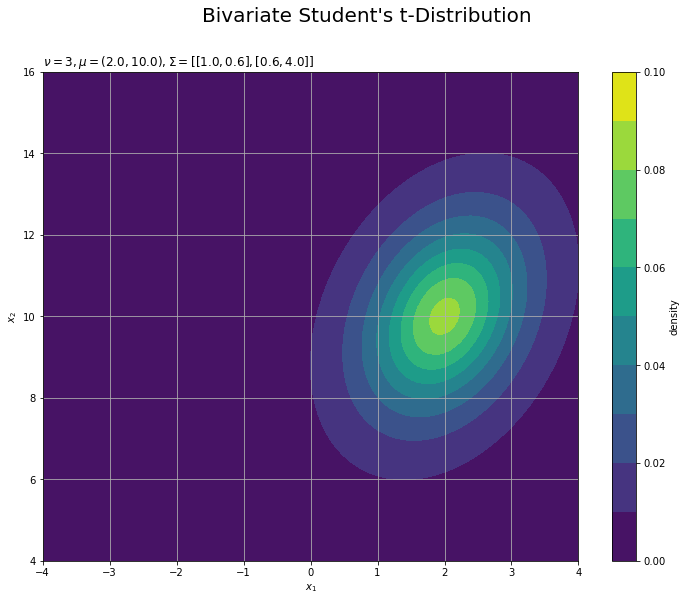

In [39]:
# 図を初期化
fig = plt.figure(figsize=(12, 9), facecolor='white') # 図の設定
fig.suptitle("Bivariate Student's t-Distribution", fontsize=20) # 全体のタイトル

# カラーバーを表示
tmp = plt.contourf(x_1_grid, x_2_grid, np.zeros(x_shape), 
                   vmin=z_min, vmax=z_max, levels=z_levels) # カラーバー用のダミー
fig.colorbar(tmp, label='density')

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目の位置ベクトルを取得
    mu_1 = mu_1_vals[i]
    mu_d = np.array([mu_1, mu_2])
    
    # 多次元t分布の確率密度を計算
    dens = multivariate_t.pdf(x=x_points, loc=mu_d, shape=sigma_dd, df=nu)
    
    # パラメータラベル用の文字列を作成
    param_text = '$\\nu=' + str(nu)
    param_text += ', \mu=(' + ', '.join([str(mu) for mu in mu_d]) + ')'
    param_text += ', \Sigma=' + str([list(sigma_d) for sigma_d in sigma_dd]) + '$'

    # 2次元t分布を作図:(等高線図)
    #plt.contour(x_1_grid, x_2_grid, dens.reshape(x_dims), 
    #             vmin=z_min, vmax=z_max, levels=z_levels) # 等高線
    plt.contourf(x_1_grid, x_2_grid, dens.reshape(x_dims), 
                 vmin=z_min, vmax=z_max, levels=z_levels) # 塗りつぶし等高線
    plt.xlabel('$x_1$') # x軸ラベル
    plt.ylabel('$x_2$') # y軸ラベル
    plt.title(param_text, loc='left') # タイトル
    plt.grid() # グリッド線

# gif画像を作成
anime_dens = FuncAnimation(fig, update, frames=frame_num, interval=100)

# gif画像を保存
anime_dens.save('../../figure/Python/Bivariate_t_dens_mu1_cnf.gif')

<br>

　ヒートマップのアニメーションを作成します。

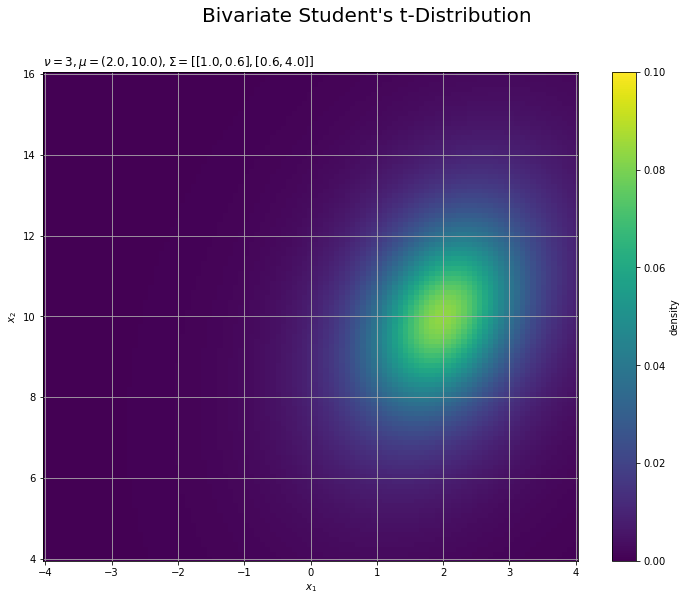

In [40]:
# 図を初期化
fig = plt.figure(figsize=(12, 9), facecolor='white') # 図の設定
fig.suptitle("Bivariate Student's t-Distribution", fontsize=20) # 全体のタイトル

# カラーバーを表示
tmp = plt.pcolor(x_1_grid, x_2_grid, np.zeros(x_shape), 
                 vmin=z_min, vmax=z_max) # カラーバー用のダミー
fig.colorbar(tmp, label='density')

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目の位置ベクトルを取得
    mu_1 = mu_1_vals[i]
    mu_d = np.array([mu_1, mu_2])
    
    # 多次元t分布の確率密度を計算
    dens = multivariate_t.pdf(x=x_points, loc=mu_d, shape=sigma_dd, df=nu)
    
    # パラメータラベル用の文字列を作成
    param_text = '$\\nu=' + str(nu)
    param_text += ', \mu=(' + ', '.join([str(mu) for mu in mu_d]) + ')'
    param_text += ', \Sigma=' + str([list(sigma_d) for sigma_d in sigma_dd]) + '$'

    # 2次元t分布を作図:(ヒートマップ)
    plt.pcolor(x_1_grid, x_2_grid, dens.reshape(x_dims), 
               vmin=z_min, vmax=z_max) # 塗りつぶし等高線
    plt.xlabel('$x_1$') # x軸ラベル
    plt.ylabel('$x_2$') # y軸ラベル
    plt.title(param_text, loc='left') # タイトル
    plt.grid() # グリッド線

# gif画像を作成
anime_dens = FuncAnimation(fig, update, frames=frame_num, interval=100)

# gif画像を保存
anime_dens.save('../../figure/Python/Bivariate_t_dens_mu1_pcl.gif')

<br>

　曲面図のアニメーションを作成します。

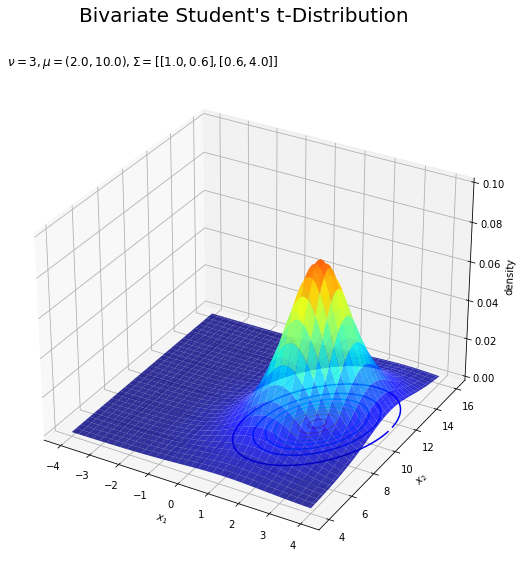

In [41]:
# 図を初期化
fig = plt.figure(figsize=(9, 9), facecolor='white') # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定
fig.suptitle("Bivariate Student's t-Distribution", fontsize=20) # 全体のタイトル

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目のパラメータを取得
    mu_1 = mu_1_vals[i]
    mu_d = np.array([mu_1, mu_2])
    
    # 多次元t分布の確率密度を計算
    dens = multivariate_t.pdf(x=x_points, loc=mu_d, shape=sigma_dd, df=nu)
    
    # パラメータラベル用の文字列を作成
    param_text = '$\\nu=' + str(nu)
    param_text += ', \mu=(' + ', '.join([str(mu) for mu in mu_d]) + ')'
    param_text += ', \Sigma=' + str([list(sigma_d) for sigma_d in sigma_dd]) + '$'

    # 2次元t分布を作図:(曲面図)
    ax.plot_surface(x_1_grid, x_2_grid, dens.reshape(x_dims), 
                    cmap='jet', vmin=z_min, vmax=z_max, alpha=0.8) # 曲面図
    ax.contour(x_1_grid, x_2_grid, dens.reshape(x_dims), 
               cmap='jet', vmin=z_min, vmax=z_max, levels=z_levels, offset=0.0) # 等高線図
    ax.set_xlabel('$x_1$') # x軸ラベル
    ax.set_ylabel('$x_2$') # y軸ラベル
    ax.set_zlabel('density') # z軸ラベル
    ax.set_title(param_text, loc='left') # タイトル
    ax.set_zlim(zmin=z_min, zmax=z_max) # z軸の表示範囲

# gif画像を作成
anime_dens = FuncAnimation(fig, update, frames=frame_num, interval=100)

# gif画像を保存
anime_dens.save('../../figure/Python/Bivariate_t_dens_mu1_srf.gif')

　$\mu_1$の値に応じて、x軸方向に移動するのが分かります。  
<br>

### 位置ベクトル(2軸)の影響

　y軸方向の位置パラメータ$\mu_2$の値を変化させ、$\nu, \mu_1, \boldsymbol{\Sigma}$を固定します。

In [42]:
# 次元数を設定:(固定)
D = 2

# 自由度を指定
nu = 3

# x軸位置パラメータを指定
mu_1 = 6.0

# y軸の位置パラメータとして利用する値を指定
mu_2_vals = np.linspace(start=-2.0, stop=2.0, num=101).round(decimals=2)

# スケール行列を指定
sigma_dd = np.array([[1.0, 0.6], [0.6, 4.0]])

# フレーム数を設定
frame_num = len(mu_2_vals)
print(frame_num)

101


　値の間隔が一定になるように$\mu_2$の値を`mu_2_vals`として作成します。また、$\mu_1$を`mu_1`として値を指定します。  

　作図用と計算用の$\mathbf{x}$を作成します。

In [43]:
# xの値を作成
x_1_vals = np.linspace(
    start=mu_1 - np.sqrt(sigma_dd[0, 0])*3.0, 
    stop=mu_1 + np.sqrt(sigma_dd[0, 0])*3.0, 
    num=101
)
x_2_vals = np.linspace(
    start=mu_2_vals.min() - np.sqrt(sigma_dd[1, 1])*2.0, 
    stop=mu_2_vals.max() + np.sqrt(sigma_dd[1, 1])*2.0, 
    num=101
)

# 作図用のxの点を作成
x_1_grid, x_2_grid = np.meshgrid(x_1_vals, x_2_vals)

# 計算用のxの点を作成
x_points = np.stack([x_1_grid.flatten(), x_2_grid.flatten()], axis=1)
x_shape = x_1_grid.shape
print(x_points.round(3))

[[ 3.   -6.  ]
 [ 3.06 -6.  ]
 [ 3.12 -6.  ]
 ...
 [ 8.88  6.  ]
 [ 8.94  6.  ]
 [ 9.    6.  ]]


<br>

　等高線の設定用の配列を作成します。

In [44]:
# z軸(確率密度)の最小値・最大値を設定
z_min = 0.0
z_max = multivariate_t.pdf(x=x_points, loc=[mu_1, mu_2_vals.mean()], shape=sigma_dd, df=nu).max()
z_max = np.ceil(z_max * 10.0) / 10.0

# 等高線を引く値を設定
z_levels = np.linspace(start=z_min, stop=z_max, num=11)
print(z_levels)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]


<br>

　等高線図のアニメーションを作成します。

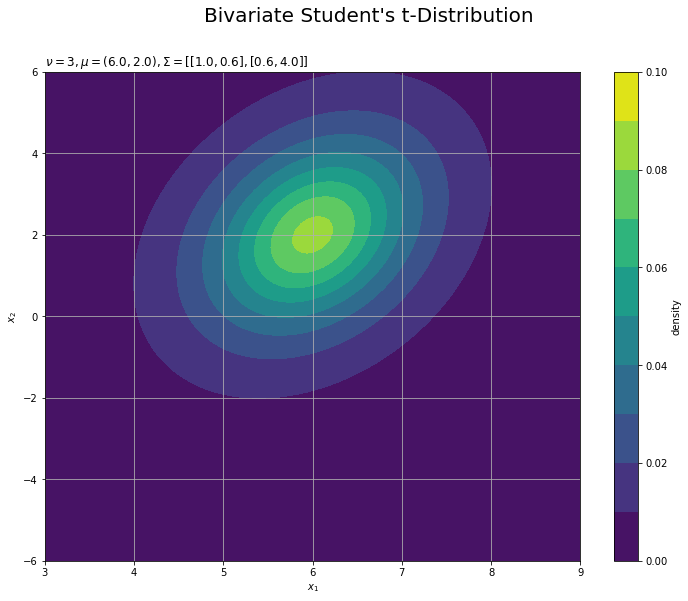

In [45]:
# 図を初期化
fig = plt.figure(figsize=(12, 9), facecolor='white') # 図の設定
fig.suptitle("Bivariate Student's t-Distribution", fontsize=20) # 全体のタイトル

# カラーバーを表示
tmp = plt.contourf(x_1_grid, x_2_grid, np.zeros(x_shape), 
                   vmin=z_min, vmax=z_max, levels=z_levels) # カラーバー用のダミー
fig.colorbar(tmp, label='density')

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目の位置ベクトルを取得
    mu_2 = mu_2_vals[i]
    mu_d = np.array([mu_1, mu_2])
    
    # 多次元t分布の確率密度を計算
    dens = multivariate_t.pdf(x=x_points, loc=mu_d, shape=sigma_dd, df=nu)
    
    # パラメータラベル用の文字列を作成
    param_text = '$\\nu=' + str(nu)
    param_text += ', \mu=(' + ', '.join([str(mu) for mu in mu_d]) + ')'
    param_text += ', \Sigma=' + str([list(sigma_d) for sigma_d in sigma_dd]) + '$'

    # 2次元t分布を作図:(等高線図)
    #plt.contour(x_1_grid, x_2_grid, dens.reshape(x_dims), 
    #             vmin=z_min, vmax=z_max, levels=z_levels) # 等高線
    plt.contourf(x_1_grid, x_2_grid, dens.reshape(x_dims), 
                 vmin=z_min, vmax=z_max, levels=z_levels) # 塗りつぶし等高線
    plt.xlabel('$x_1$') # x軸ラベル
    plt.ylabel('$x_2$') # y軸ラベル
    plt.title(param_text, loc='left') # タイトル
    plt.grid() # グリッド線

# gif画像を作成
anime_dens = FuncAnimation(fig, update, frames=frame_num, interval=100)

# gif画像を保存
anime_dens.save('../../figure/Python/Bivariate_t_dens_mu2_cnf.gif')

<br>

　ヒートマップのアニメーションを作成します。

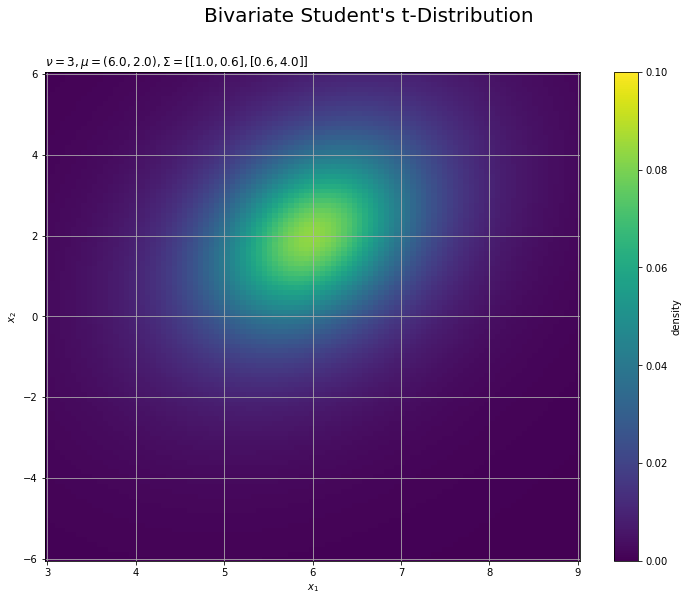

In [46]:
# 図を初期化
fig = plt.figure(figsize=(12, 9), facecolor='white') # 図の設定
fig.suptitle("Bivariate Student's t-Distribution", fontsize=20) # 全体のタイトル

# カラーバーを表示
tmp = plt.pcolor(x_1_grid, x_2_grid, np.zeros(x_shape), 
                 vmin=z_min, vmax=z_max) # カラーバー用のダミー
fig.colorbar(tmp, label='density')

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目の位置ベクトルを取得
    mu_2 = mu_2_vals[i]
    mu_d = np.array([mu_1, mu_2])
    
    # 多次元t分布の確率密度を計算
    dens = multivariate_t.pdf(x=x_points, loc=mu_d, shape=sigma_dd, df=nu)
    
    # パラメータラベル用の文字列を作成
    param_text = '$\\nu=' + str(nu)
    param_text += ', \mu=(' + ', '.join([str(mu) for mu in mu_d]) + ')'
    param_text += ', \Sigma=' + str([list(sigma_d) for sigma_d in sigma_dd]) + '$'

    # 2次元t分布を作図:(ヒートマップ)
    plt.pcolor(x_1_grid, x_2_grid, dens.reshape(x_dims), 
               vmin=z_min, vmax=z_max) # 塗りつぶし等高線
    plt.xlabel('$x_1$') # x軸ラベル
    plt.ylabel('$x_2$') # y軸ラベル
    plt.title(param_text, loc='left') # タイトル
    plt.grid() # グリッド線

# gif画像を作成
anime_dens = FuncAnimation(fig, update, frames=frame_num, interval=100)

# gif画像を保存
anime_dens.save('../../figure/Python/Bivariate_t_dens_mu2_pcl.gif')

<br>

　曲面図のアニメーションを作成します。

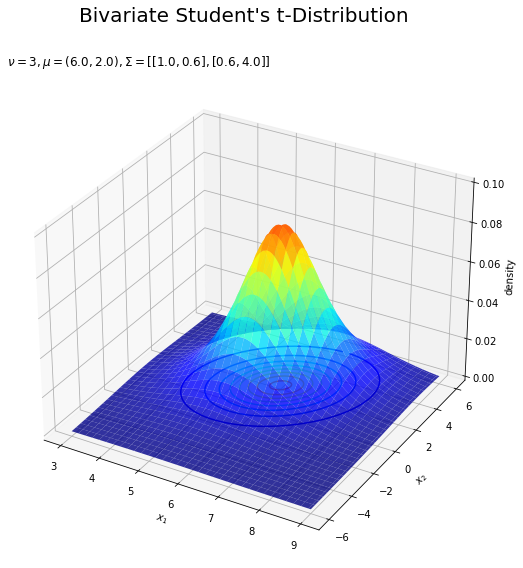

In [47]:
# 図を初期化
fig = plt.figure(figsize=(9, 9), facecolor='white') # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定
fig.suptitle("Bivariate Student's t-Distribution", fontsize=20) # 全体のタイトル

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目のパラメータを取得
    mu_2 = mu_2_vals[i]
    mu_d = np.array([mu_1, mu_2])
    
    # 多次元t分布の確率密度を計算
    dens = multivariate_t.pdf(x=x_points, loc=mu_d, shape=sigma_dd, df=nu)
    
    # パラメータラベル用の文字列を作成
    param_text = '$\\nu=' + str(nu)
    param_text += ', \mu=(' + ', '.join([str(mu) for mu in mu_d]) + ')'
    param_text += ', \Sigma=' + str([list(sigma_d) for sigma_d in sigma_dd]) + '$'

    # 2次元t分布を作図:(曲面図)
    ax.plot_surface(x_1_grid, x_2_grid, dens.reshape(x_dims), 
                    cmap='jet', vmin=z_min, vmax=z_max, alpha=0.8) # 曲面図
    ax.contour(x_1_grid, x_2_grid, dens.reshape(x_dims), 
               cmap='jet', vmin=z_min, vmax=z_max, levels=z_levels, offset=0.0) # 等高線図
    ax.set_xlabel('$x_1$') # x軸ラベル
    ax.set_ylabel('$x_2$') # y軸ラベル
    ax.set_zlabel('density') # z軸ラベル
    ax.set_title(param_text, loc='left') # タイトル
    ax.set_zlim(zmin=z_min, zmax=z_max) # z軸の表示範囲

# gif画像を作成
anime_dens = FuncAnimation(fig, update, frames=frame_num, interval=100)

# gif画像を保存
anime_dens.save('../../figure/Python/Bivariate_t_dens_mu2_srf.gif')

　$\mu_2$の値に応じて、y軸方向に移動するのが分かります。  
<br>

### スケール行列(1,1成分)の影響

　続いて、x軸方向のスケール$\sigma_{1,1}$の値を変化させ、$\nu, \boldsymbol{\mu}, \sigma_{1,2}, \sigma_{2,1}, \sigma_{2,2}$を固定します。

In [48]:
# 次元数を設定:(固定)
D = 2

# 自由度を指定
nu = 3

# 位置ベクトルを指定
mu_1 = np.array([6.0, 10.0])

# x軸のスケールパラメータとして利用する値を指定
sigma_11_vals = np.arange(start=0.5, stop=6.0, step=0.1).round(decimals=1)

# y軸のスケールパラメータを指定
sigma_22 = 4.0

# x・y軸のスケールパラメータを指定
sigma_12 = 0.6

# フレーム数を設定
frame_num = len(sigma_11_vals)
print(frame_num)

55


　値の間隔が一定になるように$\sigma_{1,1}$の値を`sigma_11_vals`として作成します。また、$\sigma_{2,2}$を`sigma_22`、$\sigma_{1,2} = \sigma_{2,1}$を`sigma_12`として値を指定します。  

　作図用と計算用の$\mathbf{x}$を作成します。

In [49]:
# xの値を作成
x_1_vals = np.linspace(
    start=mu_d[0] - np.sqrt(sigma_11_vals.max())*2.0, 
    stop=mu_d[0] + np.sqrt(sigma_11_vals.max())*2.0, 
    num=101
)
x_2_vals = np.linspace(
    start=mu_d[1] - np.sqrt(sigma_22)*3.0, 
    stop=mu_d[1] + np.sqrt(sigma_22)*3.0, 
    num=101
)

# 作図用のxの点を作成
x_1_grid, x_2_grid = np.meshgrid(x_1_vals, x_2_vals)

# 計算用のxの点を作成
x_points = np.stack([x_1_grid.flatten(), x_2_grid.flatten()], axis=1)
x_shape = x_1_grid.shape
print(x_points.round(3))

[[ 1.142  4.   ]
 [ 1.239  4.   ]
 [ 1.336  4.   ]
 ...
 [10.664 16.   ]
 [10.761 16.   ]
 [10.858 16.   ]]


<br>

　等高線の設定用の配列を作成します。

In [50]:
# z軸(確率密度)の最小値・最大値を設定
z_min = 0.0
z_max = multivariate_t.pdf(x=x_points, loc=mu_d, shape=np.array([[sigma_11_vals.min(), sigma_12], [sigma_12, sigma_22]]), df=nu).max()
z_max = np.ceil(z_max * 10.0) / 10.0

# 等高線を引く値を設定
z_levels = np.linspace(start=z_min, stop=z_max, num=11)
print(z_levels)

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2 ]


<br>

　等高線図のアニメーションを作成します。

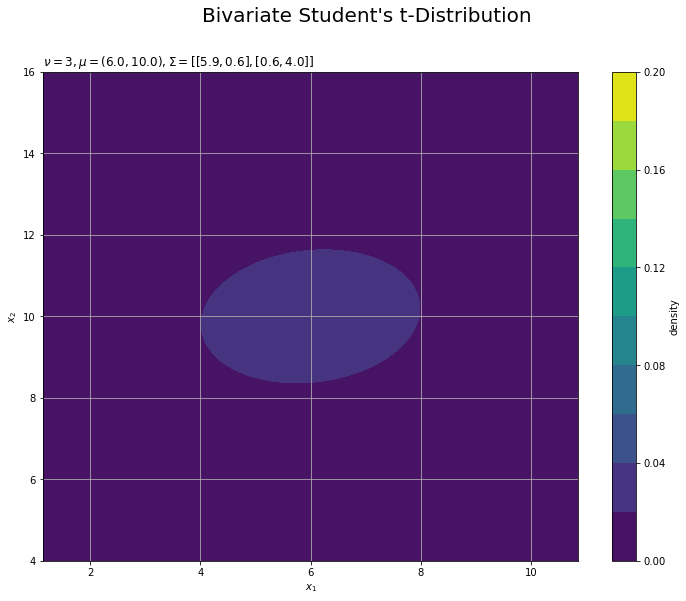

In [51]:
# 図を初期化
fig = plt.figure(figsize=(12, 9), facecolor='white') # 図の設定
fig.suptitle("Bivariate Student's t-Distribution", fontsize=20) # 全体のタイトル

# カラーバーを表示
tmp = plt.contourf(x_1_grid, x_2_grid, np.zeros(x_shape), 
                   vmin=z_min, vmax=z_max, levels=z_levels) # カラーバー用のダミー
fig.colorbar(tmp, label='density')

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目のスケール行列を取得
    sigma_11 = sigma_11_vals[i]
    sigma_dd = np.array([[sigma_11, sigma_12], [sigma_12, sigma_22]])
    
    # 多次元t分布の確率密度を計算
    dens = multivariate_t.pdf(x=x_points, loc=mu_d, shape=sigma_dd, df=nu)
    
    # パラメータラベル用の文字列を作成
    param_text = '$\\nu=' + str(nu)
    param_text += ', \mu=(' + ', '.join([str(mu) for mu in mu_d]) + ')'
    param_text += ', \Sigma=' + str([list(sigma_d) for sigma_d in sigma_dd]) + '$'

    # 2次元t分布を作図:(等高線図)
    #plt.contour(x_1_grid, x_2_grid, dens.reshape(x_dims), 
    #             vmin=z_min, vmax=z_max, levels=z_levels) # 等高線
    plt.contourf(x_1_grid, x_2_grid, dens.reshape(x_dims), 
                 vmin=z_min, vmax=z_max, levels=z_levels) # 塗りつぶし等高線
    plt.xlabel('$x_1$') # x軸ラベル
    plt.ylabel('$x_2$') # y軸ラベル
    plt.title(param_text, loc='left') # タイトル
    plt.grid() # グリッド線

# gif画像を作成
anime_dens = FuncAnimation(fig, update, frames=frame_num, interval=100)

# gif画像を保存
anime_dens.save('../../figure/Python/Bivariate_t_dens_sigma11_cnf.gif')

<br>

　ヒートマップのアニメーションを作成します。

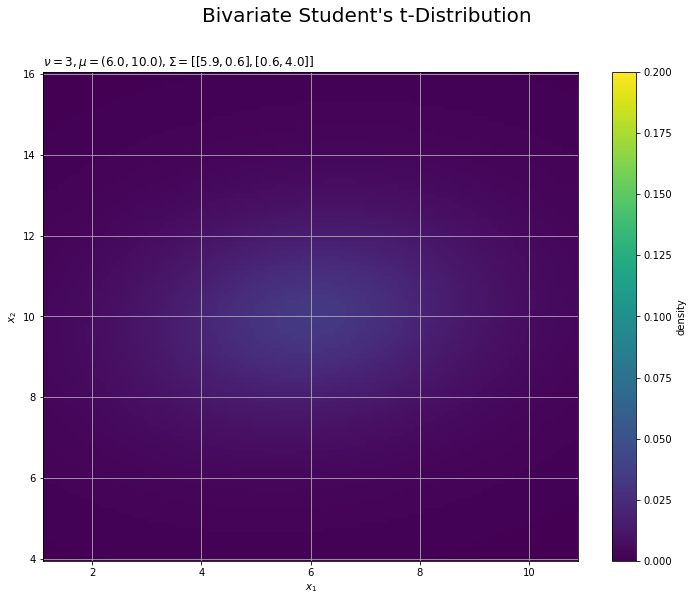

In [52]:
# 図を初期化
fig = plt.figure(figsize=(12, 9), facecolor='white') # 図の設定
fig.suptitle("Bivariate Student's t-Distribution", fontsize=20) # 全体のタイトル

# カラーバーを表示
tmp = plt.pcolor(x_1_grid, x_2_grid, np.zeros(x_shape), 
                 vmin=z_min, vmax=z_max) # カラーバー用のダミー
fig.colorbar(tmp, label='density')

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目のスケール行列を取得
    sigma_11 = sigma_11_vals[i]
    sigma_dd = np.array([[sigma_11, sigma_12], [sigma_12, sigma_22]])
    
    # 多次元t分布の確率密度を計算
    dens = multivariate_t.pdf(x=x_points, loc=mu_d, shape=sigma_dd, df=nu)
    
    # パラメータラベル用の文字列を作成
    param_text = '$\\nu=' + str(nu)
    param_text += ', \mu=(' + ', '.join([str(mu) for mu in mu_d]) + ')'
    param_text += ', \Sigma=' + str([list(sigma_d) for sigma_d in sigma_dd]) + '$'

    # 2次元t分布を作図:(ヒートマップ)
    plt.pcolor(x_1_grid, x_2_grid, dens.reshape(x_dims), 
               vmin=z_min, vmax=z_max) # 塗りつぶし等高線
    plt.xlabel('$x_1$') # x軸ラベル
    plt.ylabel('$x_2$') # y軸ラベル
    plt.title(param_text, loc='left') # タイトル
    plt.grid() # グリッド線

# gif画像を作成
anime_dens = FuncAnimation(fig, update, frames=frame_num, interval=100)

# gif画像を保存
anime_dens.save('../../figure/Python/Bivariate_t_dens_sigma11_pcl.gif')

<br>

　曲面図のアニメーションを作成します。

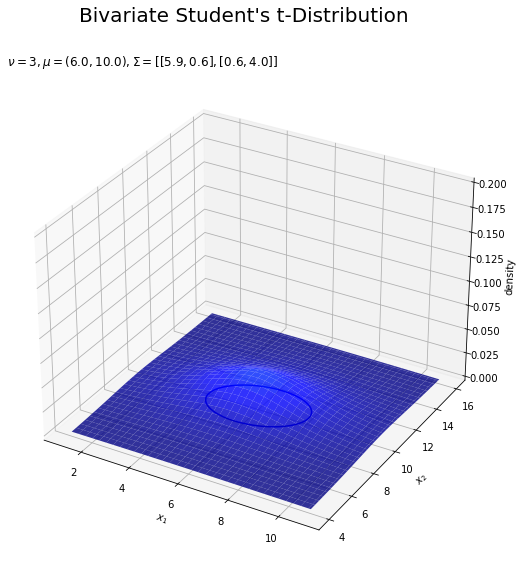

In [53]:
# 図を初期化
fig = plt.figure(figsize=(9, 9), facecolor='white') # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定
fig.suptitle("Bivariate Student's t-Distribution", fontsize=20) # 全体のタイトル

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目のスケール行列を取得
    sigma_11 = sigma_11_vals[i]
    sigma_dd = np.array([[sigma_11, sigma_12], [sigma_12, sigma_22]])
    
    # 多次元t分布の確率密度を計算
    dens = multivariate_t.pdf(x=x_points, loc=mu_d, shape=sigma_dd, df=nu)
    
    # パラメータラベル用の文字列を作成
    param_text = '$\\nu=' + str(nu)
    param_text += ', \mu=(' + ', '.join([str(mu) for mu in mu_d]) + ')'
    param_text += ', \Sigma=' + str([list(sigma_d) for sigma_d in sigma_dd]) + '$'

    # 2次元t分布を作図:(曲面図)
    ax.plot_surface(x_1_grid, x_2_grid, dens.reshape(x_dims), 
                    cmap='jet', vmin=z_min, vmax=z_max, alpha=0.8) # 曲面図
    ax.contour(x_1_grid, x_2_grid, dens.reshape(x_dims), 
               cmap='jet', vmin=z_min, vmax=z_max, levels=z_levels, offset=0.0) # 等高線図
    ax.set_xlabel('$x_1$') # x軸ラベル
    ax.set_ylabel('$x_2$') # y軸ラベル
    ax.set_zlabel('density') # z軸ラベル
    ax.set_title(param_text, loc='left') # タイトル
    ax.set_zlim(zmin=z_min, zmax=z_max) # z軸の表示範囲

# gif画像を作成
anime_dens = FuncAnimation(fig, update, frames=frame_num, interval=100)

# gif画像を保存
anime_dens.save('../../figure/Python/Bivariate_t_dens_sigma11_srf.gif')

　$\sigma_{1,1}$の値に応じて、x軸方向に広がるのが分かります。  
<br>

### スケール行列(2,2成分)の影響

　y軸方向のスケール$\sigma_{2,2}$の値を変化させ、$\nu, \boldsymbol{\mu}, \sigma_{1,1}, \sigma_{1,2}, \sigma_{2,1}$を固定します。

In [54]:
# 次元数を設定:(固定)
D = 2

# 自由度を指定
nu = 3

# 位置ベクトルを指定
mu_1 = np.array([6.0, 10.0])

# x軸のスケールパラメータを指定
sigma_11 = 1.0

# y軸のスケールパラメータとして利用する値を指定
sigma_22_vals = np.arange(start=0.5, stop=6.0, step=0.1).round(decimals=1)

# x・y軸のスケールパラメータを指定
sigma_12 = 0.6

# フレーム数を設定
frame_num = len(sigma_22_vals)
print(frame_num)

55


　値の間隔が一定になるように$\sigma_{2,2}$の値を`sigma_22_vals`として作成します。また、$\sigma_{1,1}$を`sigma_11`、$\sigma_{1,2} = \sigma_{2,1}$を`sigma_12`として値を指定します。  

　作図用と計算用の$\mathbf{x}$を作成します。

In [55]:
# xの値を作成
x_1_vals = np.linspace(
    start=mu_d[0] - np.sqrt(sigma_11)*3.0, 
    stop=mu_d[0] + np.sqrt(sigma_11)*3.0, 
    num=101
)
x_2_vals = np.linspace(
    start=mu_d[1] - np.sqrt(sigma_22_vals.max())*2.0, 
    stop=mu_d[1] + np.sqrt(sigma_22_vals.max())*2.0, 
    num=101
)

# 作図用のxの点を作成
x_1_grid, x_2_grid = np.meshgrid(x_1_vals, x_2_vals)

# 計算用のxの点を作成
x_points = np.stack([x_1_grid.flatten(), x_2_grid.flatten()], axis=1)
x_shape = x_1_grid.shape
print(x_points.round(3))

[[ 3.     5.142]
 [ 3.06   5.142]
 [ 3.12   5.142]
 ...
 [ 8.88  14.858]
 [ 8.94  14.858]
 [ 9.    14.858]]


<br>

　等高線の設定用の配列を作成します。

In [56]:
# z軸(確率密度)の最小値・最大値を設定
z_min = 0.0
z_max = multivariate_t.pdf(x=x_points, loc=mu_d, shape=np.array([[sigma_11, sigma_12], [sigma_12, sigma_22_vals.min()]]), df=nu).max()
z_max = np.ceil(z_max * 10.0) / 10.0

# 等高線を引く値を設定
z_levels = np.linspace(start=z_min, stop=z_max, num=11)
print(z_levels)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]


<br>

　等高線図のアニメーションを作成します。

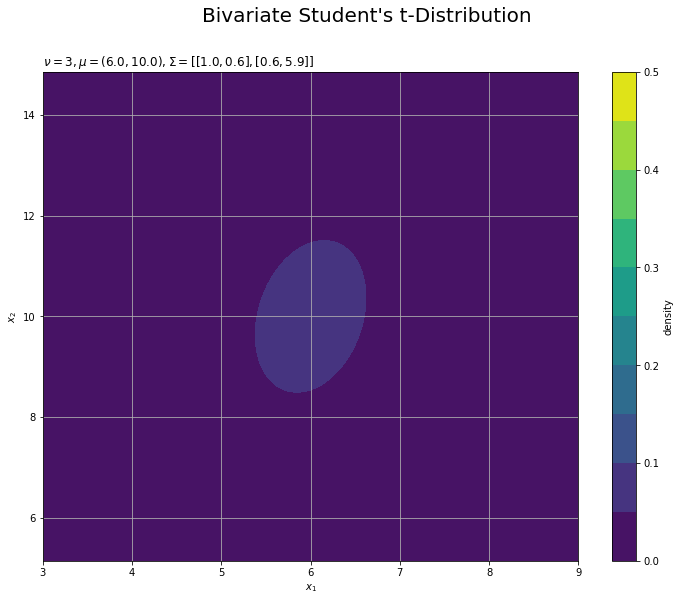

In [57]:
# 図を初期化
fig = plt.figure(figsize=(12, 9), facecolor='white') # 図の設定
fig.suptitle("Bivariate Student's t-Distribution", fontsize=20) # 全体のタイトル

# カラーバーを表示
tmp = plt.contourf(x_1_grid, x_2_grid, np.zeros(x_shape), 
                   vmin=z_min, vmax=z_max, levels=z_levels) # カラーバー用のダミー
fig.colorbar(tmp, label='density')

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目のスケール行列を取得
    sigma_22 = sigma_22_vals[i]
    sigma_dd = np.array([[sigma_11, sigma_12], [sigma_12, sigma_22]])
    
    # 多次元t分布の確率密度を計算
    dens = multivariate_t.pdf(x=x_points, loc=mu_d, shape=sigma_dd, df=nu)
    
    # パラメータラベル用の文字列を作成
    param_text = '$\\nu=' + str(nu)
    param_text += ', \mu=(' + ', '.join([str(mu) for mu in mu_d]) + ')'
    param_text += ', \Sigma=' + str([list(sigma_d) for sigma_d in sigma_dd]) + '$'

    # 2次元t分布を作図:(等高線図)
    #plt.contour(x_1_grid, x_2_grid, dens.reshape(x_dims), 
    #             vmin=z_min, vmax=z_max, levels=z_levels) # 等高線
    plt.contourf(x_1_grid, x_2_grid, dens.reshape(x_dims), 
                 vmin=z_min, vmax=z_max, levels=z_levels) # 塗りつぶし等高線
    plt.xlabel('$x_1$') # x軸ラベル
    plt.ylabel('$x_2$') # y軸ラベル
    plt.title(param_text, loc='left') # タイトル
    plt.grid() # グリッド線

# gif画像を作成
anime_dens = FuncAnimation(fig, update, frames=frame_num, interval=100)

# gif画像を保存
anime_dens.save('../../figure/Python/Bivariate_t_dens_sigma22_cnf.gif')

<br>

　ヒートマップのアニメーションを作成します。

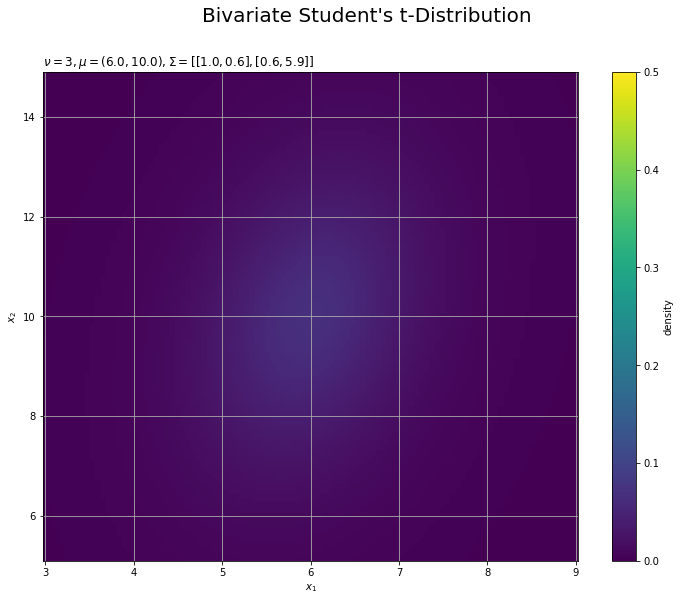

In [58]:
# 図を初期化
fig = plt.figure(figsize=(12, 9), facecolor='white') # 図の設定
fig.suptitle("Bivariate Student's t-Distribution", fontsize=20) # 全体のタイトル

# カラーバーを表示
tmp = plt.pcolor(x_1_grid, x_2_grid, np.zeros(x_shape), 
                 vmin=z_min, vmax=z_max) # カラーバー用のダミー
fig.colorbar(tmp, label='density')

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目のスケール行列を取得
    sigma_22 = sigma_22_vals[i]
    sigma_dd = np.array([[sigma_11, sigma_12], [sigma_12, sigma_22]])
    
    # 多次元t分布の確率密度を計算
    dens = multivariate_t.pdf(x=x_points, loc=mu_d, shape=sigma_dd, df=nu)
    
    # パラメータラベル用の文字列を作成
    param_text = '$\\nu=' + str(nu)
    param_text += ', \mu=(' + ', '.join([str(mu) for mu in mu_d]) + ')'
    param_text += ', \Sigma=' + str([list(sigma_d) for sigma_d in sigma_dd]) + '$'

    # 2次元t分布を作図:(ヒートマップ)
    plt.pcolor(x_1_grid, x_2_grid, dens.reshape(x_dims), 
               vmin=z_min, vmax=z_max) # 塗りつぶし等高線
    plt.xlabel('$x_1$') # x軸ラベル
    plt.ylabel('$x_2$') # y軸ラベル
    plt.title(param_text, loc='left') # タイトル
    plt.grid() # グリッド線

# gif画像を作成
anime_dens = FuncAnimation(fig, update, frames=frame_num, interval=100)

# gif画像を保存
anime_dens.save('../../figure/Python/Bivariate_t_dens_sigma22_pcl.gif')

<br>

　曲面図のアニメーションを作成します。

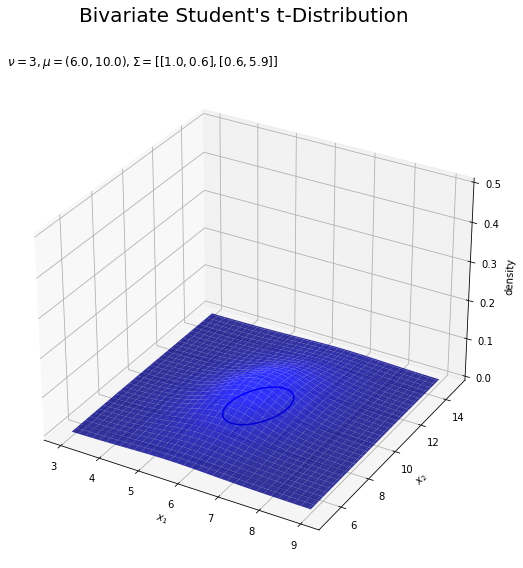

In [59]:
# 図を初期化
fig = plt.figure(figsize=(9, 9), facecolor='white') # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定
fig.suptitle("Bivariate Student's t-Distribution", fontsize=20) # 全体のタイトル

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目のスケール行列を取得
    sigma_22 = sigma_22_vals[i]
    sigma_dd = np.array([[sigma_11, sigma_12], [sigma_12, sigma_22]])
    
    # 多次元t分布の確率密度を計算
    dens = multivariate_t.pdf(x=x_points, loc=mu_d, shape=sigma_dd, df=nu)
    
    # パラメータラベル用の文字列を作成
    param_text = '$\\nu=' + str(nu)
    param_text += ', \mu=(' + ', '.join([str(mu) for mu in mu_d]) + ')'
    param_text += ', \Sigma=' + str([list(sigma_d) for sigma_d in sigma_dd]) + '$'

    # 2次元t分布を作図:(曲面図)
    ax.plot_surface(x_1_grid, x_2_grid, dens.reshape(x_dims), 
                    cmap='jet', vmin=z_min, vmax=z_max, alpha=0.8) # 曲面図
    ax.contour(x_1_grid, x_2_grid, dens.reshape(x_dims), 
               cmap='jet', vmin=z_min, vmax=z_max, levels=z_levels, offset=0.0) # 等高線図
    ax.set_xlabel('$x_1$') # x軸ラベル
    ax.set_ylabel('$x_2$') # y軸ラベル
    ax.set_zlabel('density') # z軸ラベル
    ax.set_title(param_text, loc='left') # タイトル
    ax.set_zlim(zmin=z_min, zmax=z_max) # z軸の表示範囲

# gif画像を作成
anime_dens = FuncAnimation(fig, update, frames=frame_num, interval=100)

# gif画像を保存
anime_dens.save('../../figure/Python/Bivariate_t_dens_sigma22_srf.gif')

　$\sigma_{2,2}$の値に応じて、y軸方向に広がるのが分かります。  
<br>

### スケール行列(1,2成分)の影響

　両軸のスケール$\sigma_{1,2}, \sigma_{2,1}$の値を変化させ、$\nu, \boldsymbol{\mu}, \sigma_{1,1}, \sigma_{2,2}$を固定します。

In [60]:
# 次元数を設定:(固定)
D = 2

# 自由度を指定
nu = 3

# 位置ベクトルを指定
mu_1 = np.array([6.0, 10.0])

# x軸・y軸のスケールパラメータを指定
sigma_11 = 4.0
sigma_22 = 10.0

# x・y軸のスケールパラメータとして利用する値を指定
sigma_12_vals = np.linspace(start=-5.0, stop=5.0, num=101).round(decimals=1)

# フレーム数を設定
frame_num = len(sigma_12_vals)
print(frame_num)

101


　値の間隔が一定になるように$\sigma_{1,2} = \sigma_{2,1}$の値を`sigma_12_vals`として作成します。また、$\sigma_{1,1}, \sigma_{2,2}$を`sigma_11, sigma_22`として値を指定します。  

　作図用と計算用の$\mathbf{x}$を作成します。

In [61]:
# xの値を作成
x_1_vals = np.linspace(
    start=mu_d[0] - np.sqrt(sigma_11)*3.0, 
    stop=mu_d[0] + np.sqrt(sigma_11)*3.0, 
    num=101
)
x_2_vals = np.linspace(
    start=mu_d[1] - np.sqrt(sigma_22)*3.0, 
    stop=mu_d[1] + np.sqrt(sigma_22)*3.0, 
    num=101
)

# 作図用のxの点を作成
x_1_grid, x_2_grid = np.meshgrid(x_1_vals, x_2_vals)

# 計算用のxの点を作成
x_points = np.stack([x_1_grid.flatten(), x_2_grid.flatten()], axis=1)
x_shape = x_1_grid.shape
print(x_points.round(3))

[[ 0.     0.513]
 [ 0.12   0.513]
 [ 0.24   0.513]
 ...
 [11.76  19.487]
 [11.88  19.487]
 [12.    19.487]]


<br>

　等高線の設定用の配列を作成します。

In [62]:
# z軸(確率密度)の最小値・最大値を設定
z_min = 0.0
sigma_12_max = np.max([np.abs(sigma_12_vals.min()), np.abs(sigma_12_vals.max())])
z_max = multivariate_t.pdf(x=x_points, loc=mu_d, shape=np.array([[sigma_11, sigma_12_max], [sigma_12_max, sigma_22]]), df=nu).max()
z_max = np.ceil(z_max * 10.0) / 10.0

# 等高線を引く値を設定
z_levels = np.linspace(start=z_min, stop=z_max, num=11)
print(z_levels)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]


<br>

　等高線図のアニメーションを作成します。

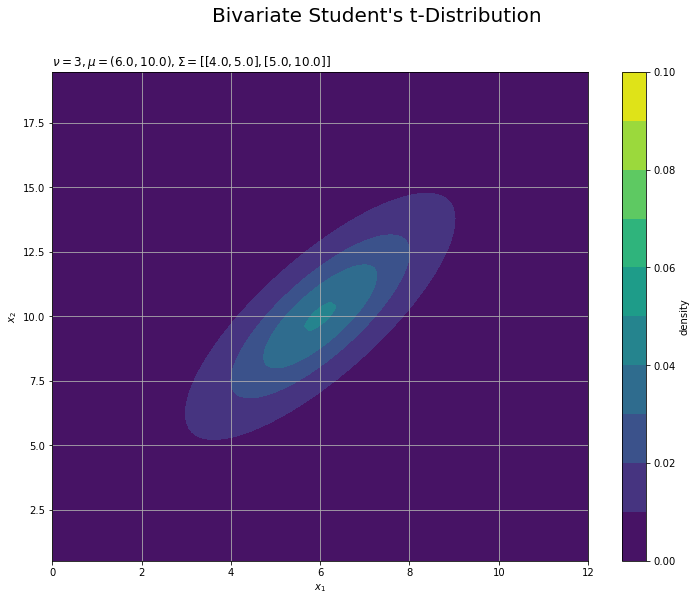

In [63]:
# 図を初期化
fig = plt.figure(figsize=(12, 9), facecolor='white') # 図の設定
fig.suptitle("Bivariate Student's t-Distribution", fontsize=20) # 全体のタイトル

# カラーバーを表示
tmp = plt.contourf(x_1_grid, x_2_grid, np.zeros(x_shape), 
                   vmin=z_min, vmax=z_max, levels=z_levels) # カラーバー用のダミー
fig.colorbar(tmp, label='density')

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目のスケール行列を取得
    sigma_12 = sigma_12_vals[i]
    sigma_dd = np.array([[sigma_11, sigma_12], [sigma_12, sigma_22]])
    
    # 多次元t分布の確率密度を計算
    dens = multivariate_t.pdf(x=x_points, loc=mu_d, shape=sigma_dd, df=nu)
    
    # パラメータラベル用の文字列を作成
    param_text = '$\\nu=' + str(nu)
    param_text += ', \mu=(' + ', '.join([str(mu) for mu in mu_d]) + ')'
    param_text += ', \Sigma=' + str([list(sigma_d) for sigma_d in sigma_dd]) + '$'

    # 2次元t分布を作図:(等高線図)
    #plt.contour(x_1_grid, x_2_grid, dens.reshape(x_dims), 
    #             vmin=z_min, vmax=z_max, levels=z_levels) # 等高線
    plt.contourf(x_1_grid, x_2_grid, dens.reshape(x_dims), 
                 vmin=z_min, vmax=z_max, levels=z_levels) # 塗りつぶし等高線
    plt.xlabel('$x_1$') # x軸ラベル
    plt.ylabel('$x_2$') # y軸ラベル
    plt.title(param_text, loc='left') # タイトル
    plt.grid() # グリッド線

# gif画像を作成
anime_dens = FuncAnimation(fig, update, frames=frame_num, interval=100)

# gif画像を保存
anime_dens.save('../../figure/Python/Bivariate_t_dens_sigma12_cnf.gif')

<br>

　ヒートマップのアニメーションを作成します。

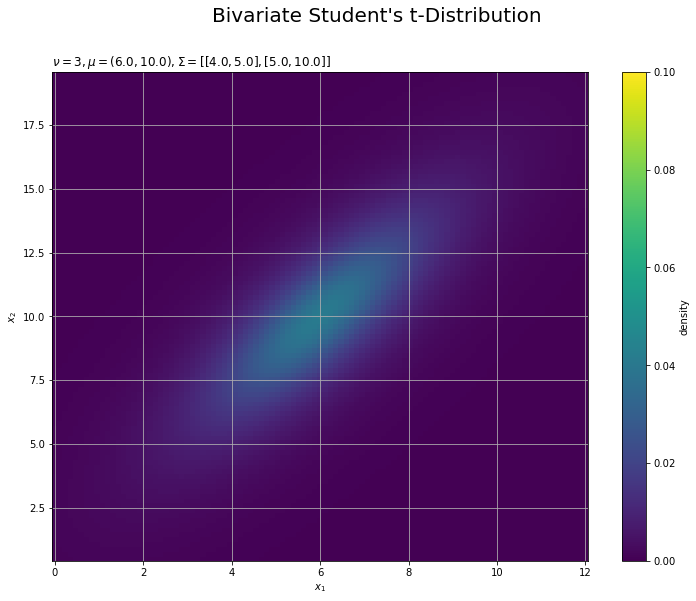

In [64]:
# 図を初期化
fig = plt.figure(figsize=(12, 9), facecolor='white') # 図の設定
fig.suptitle("Bivariate Student's t-Distribution", fontsize=20) # 全体のタイトル

# カラーバーを表示
tmp = plt.pcolor(x_1_grid, x_2_grid, np.zeros(x_shape), 
                 vmin=z_min, vmax=z_max) # カラーバー用のダミー
fig.colorbar(tmp, label='density')

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目のスケール行列を取得
    sigma_12 = sigma_12_vals[i]
    sigma_dd = np.array([[sigma_11, sigma_12], [sigma_12, sigma_22]])
    
    # 多次元t分布の確率密度を計算
    dens = multivariate_t.pdf(x=x_points, loc=mu_d, shape=sigma_dd, df=nu)
    
    # パラメータラベル用の文字列を作成
    param_text = '$\\nu=' + str(nu)
    param_text += ', \mu=(' + ', '.join([str(mu) for mu in mu_d]) + ')'
    param_text += ', \Sigma=' + str([list(sigma_d) for sigma_d in sigma_dd]) + '$'

    # 2次元t分布を作図:(ヒートマップ)
    plt.pcolor(x_1_grid, x_2_grid, dens.reshape(x_dims), 
               vmin=z_min, vmax=z_max) # 塗りつぶし等高線
    plt.xlabel('$x_1$') # x軸ラベル
    plt.ylabel('$x_2$') # y軸ラベル
    plt.title(param_text, loc='left') # タイトル
    plt.grid() # グリッド線

# gif画像を作成
anime_dens = FuncAnimation(fig, update, frames=frame_num, interval=100)

# gif画像を保存
anime_dens.save('../../figure/Python/Bivariate_t_dens_sigma12_pcl.gif')

<br>

　曲面図のアニメーションを作成します。

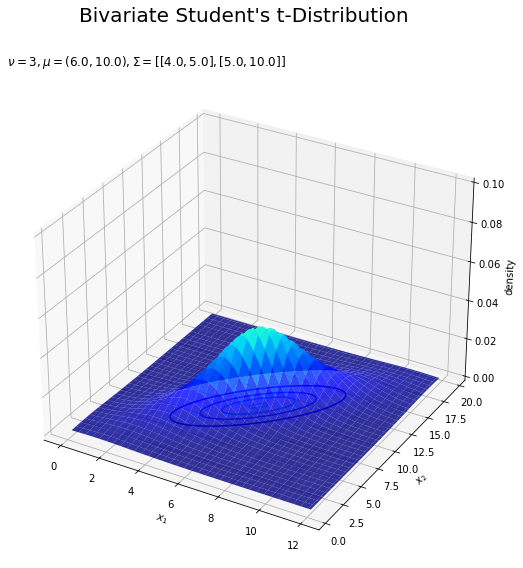

In [65]:
# 図を初期化
fig = plt.figure(figsize=(9, 9), facecolor='white') # 図の設定
ax = fig.add_subplot(projection='3d') # 3D用の設定
fig.suptitle("Bivariate Student's t-Distribution", fontsize=20) # 全体のタイトル

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目のスケール行列を取得
    sigma_12 = sigma_12_vals[i]
    sigma_dd = np.array([[sigma_11, sigma_12], [sigma_12, sigma_22]])
    
    # 多次元t分布の確率密度を計算
    dens = multivariate_t.pdf(x=x_points, loc=mu_d, shape=sigma_dd, df=nu)
    
    # パラメータラベル用の文字列を作成
    param_text = '$\\nu=' + str(nu)
    param_text += ', \mu=(' + ', '.join([str(mu) for mu in mu_d]) + ')'
    param_text += ', \Sigma=' + str([list(sigma_d) for sigma_d in sigma_dd]) + '$'

    # 2次元t分布を作図:(曲面図)
    ax.plot_surface(x_1_grid, x_2_grid, dens.reshape(x_dims), 
                    cmap='jet', vmin=z_min, vmax=z_max, alpha=0.8) # 曲面図
    ax.contour(x_1_grid, x_2_grid, dens.reshape(x_dims), 
               cmap='jet', vmin=z_min, vmax=z_max, levels=z_levels, offset=0.0) # 等高線図
    ax.set_xlabel('$x_1$') # x軸ラベル
    ax.set_ylabel('$x_2$') # y軸ラベル
    ax.set_zlabel('density') # z軸ラベル
    ax.set_title(param_text, loc='left') # タイトル
    ax.set_zlim(zmin=z_min, zmax=z_max) # z軸の表示範囲

# gif画像を作成
anime_dens = FuncAnimation(fig, update, frames=frame_num, interval=100)

# gif画像を保存
anime_dens.save('../../figure/Python/Bivariate_t_dens_sigma12_srf.gif')

　$\sigma_{1,2}$の値に応じて、x軸とy軸の広がる方向が変化するのが分かります。  
<br>

　この記事では、多次元スチューデントのt分布の作図を確認しました。  
<br>

# 参考書籍

- 須山敦志『ベイズ推論による機械学習入門』(機械学習スタートアップシリーズ)杉山将監修,講談社,2017年.
- C.M.ビショップ著,元田 浩・他訳『パターン認識と機械学習 上』丸善出版,2012年.